# Project 2: Sales Price Prediction using Ames Housing Data
---

## 1. Problem Statement

The focus of this project is to create a **regression model based on the Ames Housing dataset** to **predict the price of a house at sale**, given a set of characteristics of the house.

Such a model will be useful for people who would like to 'flip' their house (i.e. buy a house at low price, renovate to improve certain features of the house, then sell the house for a gain).

In this project, various models will be developed using regression techniques such as Linear Regression, Lasso Regression, and Ridge Regression.

The models will be cross validated, and evaluated using metrics such as R squared and Mean Squared Error before the final model is selected.

## 2. Data Cleaning & EDA

### 2.1 Import libraries & datasets

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use('seaborn-muted')
plt.rcParams['font.size'] = 14

sns.set_style(style='white')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import datasets
train= pd.read_csv('./datasets/train.csv')
test= pd.read_csv('./datasets/test.csv')

In [3]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [5]:
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


**Original datasets:**

The original **train** dataset has **2051 records**, while the **test** dataset has **879 records**.

The **train** data set has **81 columns**, **one more column than test**, which is the target variable **sales price**.

### 2.2 Review the Columns & Data Types

First, let's take a look an initial look at what are the columns in the train and test datasets, and their data types.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

In [8]:
train['Yr Sold'].value_counts()

2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64

In [9]:
test['Yr Sold'].value_counts()

2009    202
2007    196
2008    187
2006    187
2010    107
Name: Yr Sold, dtype: int64

These datasets contain housing transaction records from **Year 2006 to 2010**.

Let's start cleaning the column names by moving leading or trailing whitespace. Column names are not changed to lowercase to keep it consistent for ease of reference against data dictionary.

In [10]:
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

In [11]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [12]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

Before proceeding further, I will create a new submission dataframe to set aside the test dataset 'Id', which will be needed for Kaggle submission.

In [13]:
submission = test[['Id']]

In the train dataset, Id, PID, and SalesPrice are not predictors. 
SalesPrice is going to be the target, while 'Id' and 'PID' are just record identifiers.

So let's **drop ID and PID column**.

In [14]:
# then let's drop Id and PID, and pass the create the working 'train' and 'test' dataframes
train = train.drop(['Id', 'PID'], axis=1)
test = test.drop(['Id', 'PID'], axis=1)

Next, let's cross check the data types of the columns against the AMES Housing data documentation to see if there is any discrepancies.

**Observations on data types:**

**'MS SubClass'** and **'Mo Sold'** are reflected as integers despite they are actually categorical data with numeric labels, so these columns **should be converted to string**.

While **'Year Built', 'Year Remod/Add'** and **'Yr Sold'** are also integers, but let's keep them as integers for now so they can be used to create additional features such as 'Building Age' (taking 'Yr Sold' minus 'Year Built') later.


In [15]:
# let's go ahead and convert 'MS SubClass' and 'Mo Sold' to string
col_to_string = ['MS SubClass', 'Mo Sold']

train[col_to_string] = train[col_to_string].astype(str)
test[col_to_string] = test[col_to_string].astype(str)

### 2.3 Check for Missing Values

Next, let's look at the number of missing values for the respective columns.

In [16]:
# get the count of null values by columns, and sort in descending order.
train_na_count = train.isnull().sum().sort_values(ascending=False)
train_na_count[train_na_count >0]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Qual        114
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Qual           55
BsmtFin Type 1      55
Bsmt Cond           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Bsmt Unf SF          1
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
dtype: int64

In [17]:
test_na_count = test.isnull().sum().sort_values(ascending=False)
test_na_count[test_na_count >0]

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
BsmtFin Type 2     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
Electrical          1
Mas Vnr Area        1
Mas Vnr Type        1
dtype: int64

In [18]:
# get the percentage of null values by columns, and sort in descending order.
train_na_count = train.isnull().mean().sort_values(ascending=False)
train_na_count[train_na_count >0]

Pool QC           0.995612
Misc Feature      0.968308
Alley             0.931741
Fence             0.804973
Fireplace Qu      0.487567
Lot Frontage      0.160897
Garage Qual       0.055583
Garage Cond       0.055583
Garage Yr Blt     0.055583
Garage Finish     0.055583
Garage Type       0.055095
Bsmt Exposure     0.028279
BsmtFin Type 2    0.027304
Bsmt Qual         0.026816
BsmtFin Type 1    0.026816
Bsmt Cond         0.026816
Mas Vnr Type      0.010726
Mas Vnr Area      0.010726
Bsmt Half Bath    0.000975
Bsmt Full Bath    0.000975
Bsmt Unf SF       0.000488
Total Bsmt SF     0.000488
BsmtFin SF 1      0.000488
BsmtFin SF 2      0.000488
Garage Cars       0.000488
Garage Area       0.000488
dtype: float64

In [19]:
test_na_count = test.isnull().mean().sort_values(ascending=False)
test_na_count[test_na_count >0]

Pool QC           0.995449
Misc Feature      0.953356
Alley             0.934016
Fence             0.804323
Fireplace Qu      0.480091
Lot Frontage      0.182025
Garage Cond       0.051195
Garage Qual       0.051195
Garage Yr Blt     0.051195
Garage Finish     0.051195
Garage Type       0.050057
BsmtFin Type 1    0.028441
BsmtFin Type 2    0.028441
Bsmt Qual         0.028441
Bsmt Cond         0.028441
Bsmt Exposure     0.028441
Electrical        0.001138
Mas Vnr Area      0.001138
Mas Vnr Type      0.001138
dtype: float64

**Data Cleaning - Variables with High Percentage of Null Values**

Notably, 5 columns have high precentage (>40%) of missing values in both the train and test datasets:

1. Pool QC
2. Misc Feature
3. Alley
4. Fence
5. Fireplace Qu

For a start, let's loook at Pool QC and Fireplace Qu, and see if there is any record corresponding to the house actually having a pool (Pool Area not zero) or fireplace (Fireplace not zero).

In [20]:
train[(train['Pool QC'].isnull()) & train['Pool Area'] !=0].shape

(0, 79)

In [21]:
test[(test['Pool QC'].isnull()) & test['Pool Area'] !=0].shape

(0, 78)

In [22]:
train[(train['Fireplace Qu'].isnull()) & train['Fireplaces'] !=0].shape

(0, 79)

In [23]:
test[(test['Fireplace Qu'].isnull()) & test['Fireplaces'] !=0].shape

(0, 78)

For **Pool QC** and **Fireplace Qu**, missing values correspond to houses zero Pool Areas and Fireplaces. Let's fill the null values with 'NA'.

In [24]:
# fill null values with 'NA' corresponding to No Pool
train['Pool QC'] = train['Pool QC'].fillna('NA')
test['Pool QC'] = test['Pool QC'].fillna('NA')

In [25]:
# fill null values with 'NA' corresponding to No Fireplace
train['Fireplace Qu'] = train['Fireplace Qu'].fillna('NA')
test['Fireplace Qu'] = test['Fireplace Qu'].fillna('NA')

Let's take a closer look at Misc Feature, Alley and Fence.

In [26]:
train['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [27]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [28]:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

As for **Misc Feature**, **Alley** and **Fence**, checking against the data dictionary, it's likely that the missing values correspond to records which do not have such features (i.e. NA in the data dictionary).

Let's also fill the null values with 'NA'.

In [29]:
# fill null values with 'NA' corresponding to None
train['Misc Feature'] = train['Misc Feature'].fillna('NA')
test['Misc Feature'] = test['Misc Feature'].fillna('NA')

In [30]:
# fill null values with 'NA' corresponding to No Alley
train['Alley'] = train['Alley'].fillna('NA')
test['Alley'] = test['Alley'].fillna('NA')

In [31]:
# fill null values with 'NA' corresponding to No Fence
train['Fence'] = train['Fence'].fillna('NA')
test['Fence'] = test['Fence'].fillna('NA')

The next column with the highest number of null values is Lot Frontage. This refers to the linear feet of street connected to property. Let's see how we can fill the null values by looking at the summary statistics.

In [32]:
# obtain summary statistics of Lot Frontage
train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

So, for the **Lot Frontage** column, let's **fill the null values with the column median from the train dataset**.

In [33]:
# fill null values with column median
train['Lot Frontage'] = train['Lot Frontage'].fillna(train['Lot Frontage'].median())
test['Lot Frontage'] = test['Lot Frontage'].fillna(train['Lot Frontage'].median())

**Data Cleaning - Garage Related Variables:**

Next, let's check on a series of null values related to variables concerning the Garage.

In [34]:
garage_na_features = ['Garage Finish', 'Garage Yr Blt', 'Garage Qual', 'Garage Cond', 'Garage Type', 'Garage Cars', 'Garage Area']
train[garage_na_features].isnull().sum()

Garage Finish    114
Garage Yr Blt    114
Garage Qual      114
Garage Cond      114
Garage Type      113
Garage Cars        1
Garage Area        1
dtype: int64

In [35]:
test[garage_na_features].isnull().sum()

Garage Finish    45
Garage Yr Blt    45
Garage Qual      45
Garage Cond      45
Garage Type      44
Garage Cars       0
Garage Area       0
dtype: int64

Bulk of the missing values come from:
1. Garage Finish
2. Garage Yr Blt
3. Garage Qual
4. Garage Cond
5. Garage Type

In both the train and test datasets, the number of null values in each of these columns are the same, except 'Garage Type' which seems to have one less null values in each dataset. 

In the train data set, there is also one null value each for:
6. Garage Cars
7. Garage Area

Let's first check if the additional null values for Garage Finish, Garage Yr Blt, Garage Qual and Garage Cond are coming from the same record.

In [36]:
# checking if null values for Garage Finish, Garage Yr Blt, Garage Qual, Garage Cond are from same records
train[(train['Garage Finish'].isnull()) & (train['Garage Yr Blt'].isnull()) & (train['Garage Qual'].isnull()) & (train['Garage Cond'].isnull())].shape

(114, 79)

In [37]:
test[(test['Garage Finish'].isnull()) & (test['Garage Yr Blt'].isnull()) & (test['Garage Qual'].isnull()) & (test['Garage Cond'].isnull())].shape

(45, 78)

In [38]:
# check for the odd record with Garage Type data and not the rest of the garage column data
train[(train['Garage Type'].notnull()) & (train['Garage Finish'].isnull())][['Year Built', 'Year Remod/Add', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']]

Year Built  Year Remod/Add Garage Type  Garage Yr Blt Garage Finish  \
1712        1923            1999      Detchd            NaN           NaN   

      Garage Cars  Garage Area Garage Qual Garage Cond  
1712          NaN          NaN         NaN         NaN

In [39]:
test[(test['Garage Type'].notnull()) & (test['Garage Finish'].isnull())][['Year Built', 'Year Remod/Add','Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']]

Year Built  Year Remod/Add Garage Type  Garage Yr Blt Garage Finish  \
765        1910            1983      Detchd            NaN           NaN   

     Garage Cars  Garage Area Garage Qual Garage Cond  
765            1          360         NaN         NaN

In these two cases, the garages seem to exist but the relevant data is not captured.

Let's impute missing values as follow:
* 'Garage Finish', 'Garage Qual', 'Garage Cond' - Assume as column mode from train dataset
* 'Garage Yr Blt' - Assume same year as 'Year Remod/Add'
* 'Garage Area', 'Garage Cars' - Assume as column median in train dataset

In [40]:
# obtain the mode for Garage Finish, Garage Qual, Garage Cond
train[['Garage Finish','Garage Qual', 'Garage Cond']].mode()

Garage Finish Garage Qual Garage Cond
0           Unf          TA          TA

In [41]:
# fill null values of Garage Finish, Garage Qual and Garage Cond with the mode obtained
train.loc[1712, 'Garage Finish'] = 'Unf'
train.loc[1712, ['Garage Qual', 'Garage Cond']] = 'TA'
test.loc[765, 'Garage Finish'] = 'Unf'
test.loc[765, ['Garage Qual', 'Garage Cond']] = 'TA'

In [42]:
# fill null values of Garage Yr Blt with the Year Remod/Add
train.loc[1712, 'Garage Yr Blt'] = train.loc[1712]['Year Remod/Add']
test.loc[765, 'Garage Yr Blt'] = test.loc[765]['Year Remod/Add']

In [43]:
# obtain the median for Garage Area and Garage Cars
train[['Garage Area', 'Garage Cars']].median()

Garage Area    480.0
Garage Cars      2.0
dtype: float64

In [44]:
# fill null values with column median
train.loc[1712, 'Garage Area'] = train['Garage Area'].median()
train.loc[1712, 'Garage Cars'] = train['Garage Cars'].median()

Now for the rest of the cases where the houses are assumed to have no garage, for the columns '**Garage Finish, Garage Qual, Garage Cond, Garage Type** which are non-numeric, let's **fill null values with string 'NA'**.

As for **Garage Yr Blt**, let's **fill null values with 0.**  

In [45]:
# fill respective Garage related columns with 'NA' or 0 accordingly
col_to_NA = ['Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Type']
col_to_zero = ['Garage Yr Blt']

train[col_to_NA] = train[col_to_NA].fillna('NA')
test[col_to_NA] = test[col_to_NA].fillna('NA')
train[col_to_zero] = train[col_to_zero].fillna(0)
test[col_to_zero] = test[col_to_zero].fillna(0)

Garage Yr Blt can be converted to integer now that there is no null value, to align to other variables for Year.

In [46]:
# change to integer datatype
train['Garage Yr Blt'] = train['Garage Yr Blt'].astype(int)
test['Garage Yr Blt'] = test['Garage Yr Blt'].astype(int)

**Data Cleaning - Basement Related Variables:**

Similarly, for Basement, there are several variables with a number of null values.

In [47]:
basement_na_features = ['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Cond', 'Bsmt Qual', 'Bsmt Full Bath', 
                        'Bsmt Half Bath', 'Bsmt Unf SF', 'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2']

In [48]:
train[basement_na_features].isnull().sum()

Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin Type 2    56
Bsmt Cond         55
Bsmt Qual         55
Bsmt Full Bath     2
Bsmt Half Bath     2
Bsmt Unf SF        1
Total Bsmt SF      1
BsmtFin SF 1       1
BsmtFin SF 2       1
dtype: int64

In [49]:
test[basement_na_features].isnull().sum()

Bsmt Exposure     25
BsmtFin Type 1    25
BsmtFin Type 2    25
Bsmt Cond         25
Bsmt Qual         25
Bsmt Full Bath     0
Bsmt Half Bath     0
Bsmt Unf SF        0
Total Bsmt SF      0
BsmtFin SF 1       0
BsmtFin SF 2       0
dtype: int64

Again, in the train dataset, the number of null values in each of these columns are the same, except for Bsmt Exposure and BsmtFin Type 2.

In the train dataset, there are also a few null values in Bsmt Full Bath, Bsmt Half Bath, Bsmt Unf SF, Total Bsmt SF, BsmtFin SF 1 and BsmtFin SF 2.

Let's first check if the additional null values for BsmtFin Type 1, Bsmt Cond and Bsmt Qual are coming from the same record.

In [50]:
# checking for train dataset if null values for BsmtFin Type 1, Bsmt Cond and Bsmt Qual are from same records
train[(train['BsmtFin Type 1'].isnull()) & (train['Bsmt Cond'].isnull()) 
      & (train['Bsmt Qual'].isnull()) ].shape

(55, 79)

In [51]:
# and checking for test dataset if null values for Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Bsmt Cond and Bsmt Qual are from same records
test[(test['Bsmt Exposure'].isnull()) & (test['BsmtFin Type 1'].isnull()) 
     & (test['BsmtFin Type 2'].isnull()) & (test['Bsmt Cond'].isnull()) & (test['Bsmt Qual'].isnull()) ].shape

(25, 78)

In [52]:
# check for the odd records in train dataset with null values in Bsmt Exposure 
train[(train['Bsmt Cond'].notnull()) & (train['Bsmt Exposure'].isnull())][['Year Built']+basement_na_features]

Year Built Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Bsmt Cond  \
1456        2007           NaN            Unf            Unf        TA   
1547        2005           NaN            Unf            Unf        TA   
1997        2002           NaN            Unf            Unf        TA   

     Bsmt Qual  Bsmt Full Bath  Bsmt Half Bath  Bsmt Unf SF  Total Bsmt SF  \
1456        Gd             0.0             0.0        725.0          725.0   
1547        Gd             0.0             0.0       1595.0         1595.0   
1997        Gd             0.0             0.0        936.0          936.0   

      BsmtFin SF 1  BsmtFin SF 2  
1456           0.0           0.0  
1547           0.0           0.0  
1997           0.0           0.0

In [53]:
# and check for the odd records in train dataset with null value in BsmtFin Type 2
train[(train['Bsmt Cond'].notnull()) & (train['BsmtFin Type 2'].isnull())][['Year Built']+basement_na_features]

Year Built Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Bsmt Cond  \
1147        2003            No            GLQ            NaN        TA   

     Bsmt Qual  Bsmt Full Bath  Bsmt Half Bath  Bsmt Unf SF  Total Bsmt SF  \
1147        Gd             1.0             0.0       1603.0         3206.0   

      BsmtFin SF 1  BsmtFin SF 2  
1147        1124.0         479.0

For these cases, there seem to be Basement in the house, but Bsmt Exposure and BsmtFin Type 2 data are not capture. Let's see if we can fill the null values with column mode.

In [54]:
# obtain the mode of these 2 columns
train[['Bsmt Exposure', 'BsmtFin Type 2']].mode()

Bsmt Exposure BsmtFin Type 2
0            No            Unf

For BsmtFin Type 2, it is not logical to fill null values as 'Unf' when the BsmtFIn SF is greater than 0, so let's check the category with next highest frequency count.

In [55]:
# obtain the mode of BsmtFin Type 2
train['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

Let's impute missing values with:
* Bsmt Exposure - assume as colume mode from the train dataset
* BsmtFin Type 2 - assume as 'Rec' which is the second highest occurring category after 'Unf'

In [56]:
# impute the missing values accordingly
index_to_clean = [1456, 1547, 1997]
for idx in index_to_clean:
    train.loc[idx, 'Bsmt Exposure'] = 'No'

In [57]:
train.loc[1147, ['BsmtFin Type 2']] = 'Rec'

We can now proceed to clean the rest of the null values assuming that there is no basement in these houses.

For **Bsmt Exposure, Bsmt Cond, Bsmt Qual, BsmtFin Type 1** and **BsmtFin Type**, we will **fill null values with 'NA'**.

In [58]:
# for the rest of the missing values, fill with 'NA'
col_to_NA = ['Bsmt Exposure', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin Type 2']

train[col_to_NA] = train[col_to_NA].fillna('NA')
test[col_to_NA] = test[col_to_NA].fillna('NA')

Also noted for the train data set, there are small number of null values in other Basement related columns Bsmt Full Bath, Bsmt Half Bath, Total Bsmt SF, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF. Let's check.

In [59]:
train[train['Bsmt Full Bath'].isnull()][['Year Built']+basement_na_features]

Year Built Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Bsmt Cond  \
616         1959            NA             NA             NA        NA   
1327        1946            NA             NA             NA        NA   

     Bsmt Qual  Bsmt Full Bath  Bsmt Half Bath  Bsmt Unf SF  Total Bsmt SF  \
616         NA             NaN             NaN          0.0            0.0   
1327        NA             NaN             NaN          NaN            NaN   

      BsmtFin SF 1  BsmtFin SF 2  
616            0.0           0.0  
1327           NaN           NaN

These are the houses with no basement. 

For the columns **'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'Total Bsmt SF', 'BsmtFin SF 1'** and **'BsmtFin SF 2'**, let's **fill null values with 0** .

In [60]:
# fill null values of these basement related columns with 0

col_to_zero = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2']

train[col_to_zero] = train[col_to_zero].fillna(0)
test[col_to_zero] = test[col_to_zero].fillna(0)

We will now review the missing values related to Masonry, in the 'Mas Vnr Type' and 'Mas Vnr Area' columns.

In [61]:
train[(train['Mas Vnr Type'].isnull()) & train['Mas Vnr Area'].notnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice]
Index: []

[0 rows x 79 columns]

In [62]:
test[(test['Mas Vnr Type'].isnull()) & test['Mas Vnr Area'].notnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type]
Index: []

[0 rows x 78 columns]

In [63]:
train['Mas Vnr Type'].mode()

0    None
dtype: object

Noted that the records with missing values in Mas Vnr Type correspond those with missing values in Mas Vnr Area. Let's also assume that the missing values for Mas Vnr Type is 'None' (which is the mode in the train adata set).

For **Mas Vnr Type** column, let's **fill null values with 'None'**.

As for **Mas Vnr Area** column, let's **fill null values with 0**.

In [64]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna('None')
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna('None')
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)

Finally, let's look at the 'Electrical' column in the test data set.

In [65]:
train['Electrical'].mode()

0    SBrkr
dtype: object

Let's assume that the missing value take on 'SBrkr', which is the mode in the train dataset.

In [66]:
test['Electrical'] = test['Electrical'].fillna('SBrkr')

Let's do a last check for any missing value left.

In [67]:
# check any null value in the 2 data set
train.isnull().sum().sum()

0

In [68]:
test.isnull().sum().sum()

0

### 2.4 Mapping Categorical Data

Let's look at the columns with datatype of object:

In [69]:
train.select_dtypes(include = ['object']).columns

Index(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Mo Sold', 'Sale Type'],
      dtype='object')

Checking against the data dictionary, there are several ordinal variables that can be mapped to numeric values.

Let's first create a dictionary which contain the ordinal variable names and the corresponding scale to map to.

In [70]:
# create dictionary for mapping of ordinal variables
replace_map = {
    'Lot Shape': {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0},
    'Utilities': {'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0},
    'Land Slope': {'Gtl':2, 'Mod':1, 'Sev':0},
    'Exter Qual': {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
    'Exter Cond': {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
    'Bsmt Qual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'Bsmt Cond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'Bsmt Exposure': {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
    'BsmtFin Type 1': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2,'Unf':1, 'NA':0},
    'BsmtFin Type 2': {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2,'Unf':1, 'NA':0},
    'Pool QC': {'Ex': 4, 'Gd':3, 'TA': 2, 'Fa': 1, 'NA':0},
    'Fireplace Qu':{'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'Heating QC': {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
    'Electrical': {'SbrKr':4, 'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0},
    'Kitchen Qual': {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
    'Functional': {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
    'Garage Finish': {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
    'Garage Qual': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'Garage Cond': {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
    'Fence': {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0},
    'Paved Drive': {'Y':2, 'P':1, 'N':0},
}

In [71]:
# mapping the ordinal scale in both train and test dataset
train.replace(replace_map, inplace=True)
test.replace(replace_map, inplace=True)

Let's map our variables into various lists for EDA.

In [72]:
numeric = [col for col in train._get_numeric_data().columns if col != 'SalePrice']
numeric

['Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Utilities',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Pool QC',
 'Fence',
 'Misc Val',
 'Yr Sold']

In [73]:
# based on the above, segregate the numeric continuous variables
numeric_continuous = ['Lot Frontage',
 'Lot Area',
'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Yr Blt',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 ]

In [74]:
# and the numeric categorical variables
numeric_cat = [
 'Lot Shape',
 'Utilities',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating QC',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Cars',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Yr Sold']

In [75]:
# also creating a list of nominal categorical variables based on the data type object
nominal_cat = train.select_dtypes(include = ['object']).columns
nominal_cat

Index(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour',
       'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
       'Garage Type', 'Misc Feature', 'Mo Sold', 'Sale Type'],
      dtype='object')

### 2.6 EDA

#### 2.6.1 SalePrice

First, let's look at the summary statistics and distribution of SalePrice.

In [76]:
train[['SalePrice']].describe().round()

SalePrice
count     2051.0
mean    181470.0
std      79259.0
min      12789.0
25%     129825.0
50%     162500.0
75%     214000.0
max     611657.0

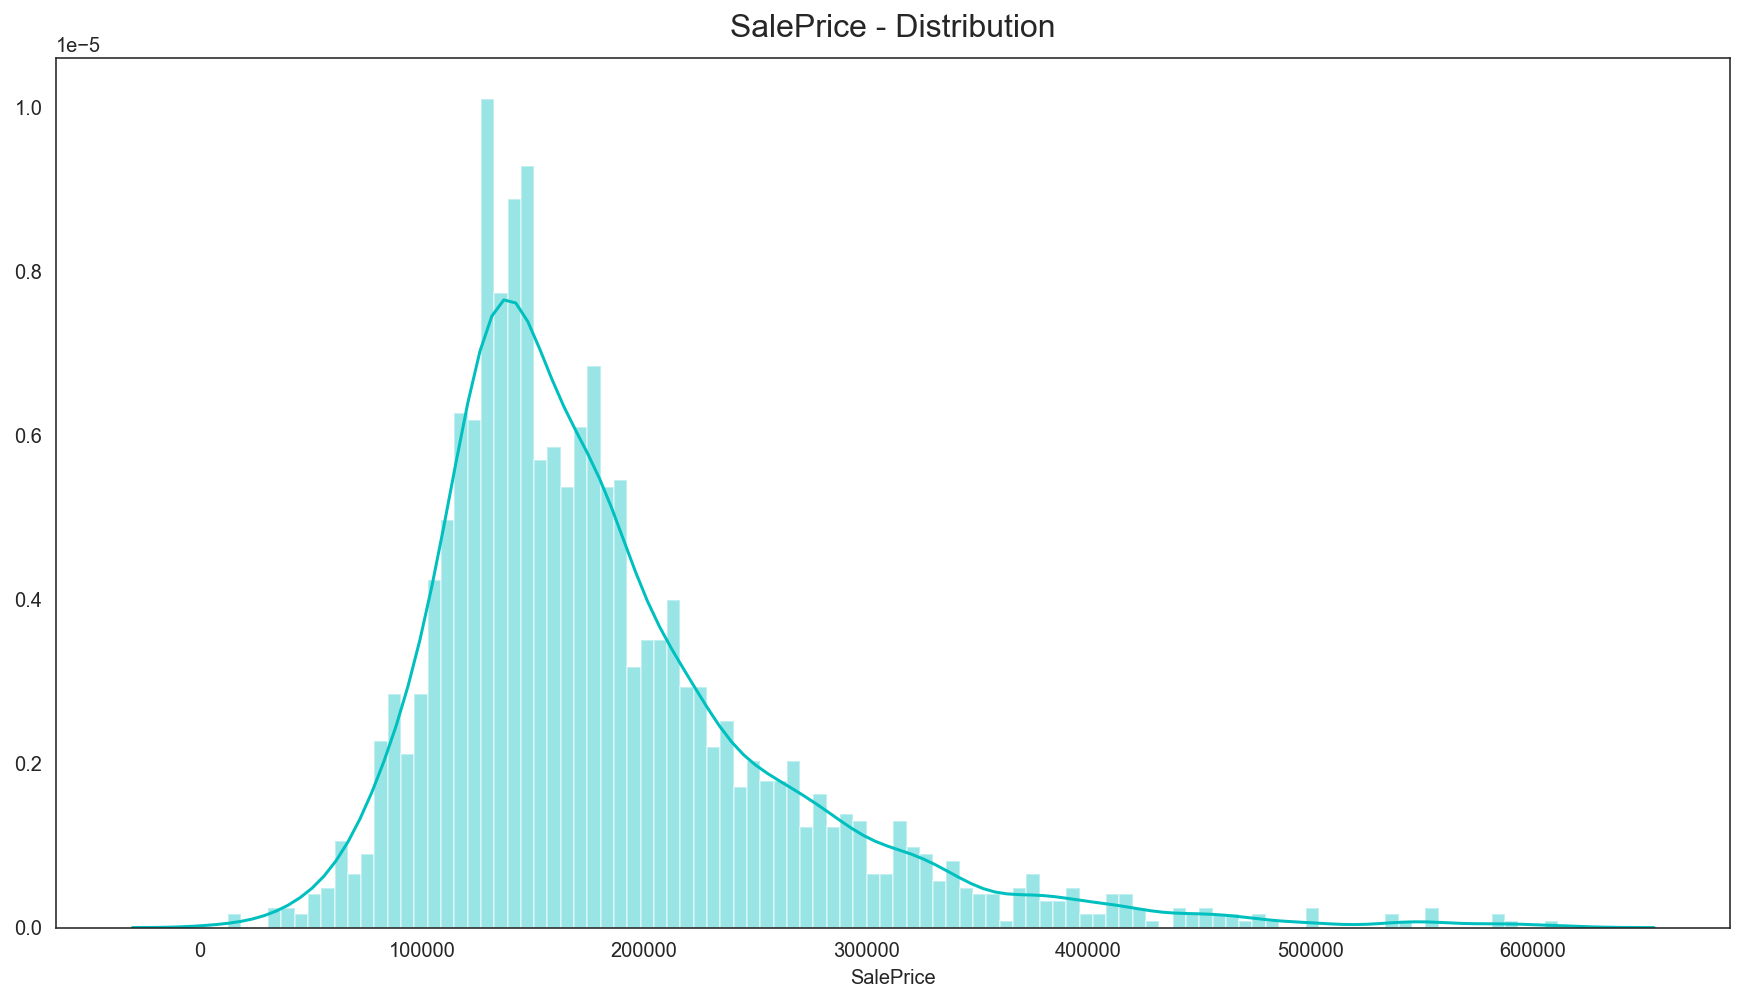

In [77]:
# plot distribution plot for SalePrice

plt.figure(figsize=(15, 8))
g = sns.distplot(train['SalePrice'], color='c', bins=100);
g.set_title('SalePrice - Distribution', y=1.01, fontsize=16);

In [78]:
train['SalePrice'].skew()

1.5575514385863427

The mean SalePrice is $181,470, with a standard deviation of 79,259.

The distribution of SalesPrice is skewed to the right. With fewer values greater than 400000, the model built will not predict SalePrices as well as in the range below 400000. 

#### 2.6.2 Numeric Variables - Continuous

Let's take a look at the summary statistics of numeric variables:

In [79]:
train[numeric_continuous + ['SalePrice']].describe().T.round()

count      mean      std      min       25%       50%  \
Lot Frontage     2051.0      69.0     21.0     21.0      60.0      68.0   
Lot Area         2051.0   10065.0   6742.0   1300.0    7500.0    9430.0   
Year Built       2051.0    1972.0     30.0   1872.0    1954.0    1974.0   
Year Remod/Add   2051.0    1984.0     21.0   1950.0    1964.0    1993.0   
Mas Vnr Area     2051.0      99.0    174.0      0.0       0.0       0.0   
BsmtFin SF 1     2051.0     442.0    461.0      0.0       0.0     368.0   
BsmtFin SF 2     2051.0      48.0    165.0      0.0       0.0       0.0   
Bsmt Unf SF      2051.0     567.0    445.0      0.0     220.0     474.0   
Total Bsmt SF    2051.0    1057.0    450.0      0.0     793.0     994.0   
1st Flr SF       2051.0    1164.0    396.0    334.0     880.0    1093.0   
2nd Flr SF       2051.0     329.0    426.0      0.0       0.0       0.0   
Low Qual Fin SF  2051.0       6.0     51.0      0.0       0.0       0.0   
Gr Liv Area      2051.0    1499.0    500.0    334.0    1129.0    1444.0   
Garage Yr Blt    2051.0    1870.0    452.0      0.0    1958.0    1978.0   
Garage Area      2051.0     474.0    216.0      0.0     319.0     480.0   
Wood Deck SF     2051.0      94.0    129.0      0.0       0.0       0.0   
Open Porch SF    2051.0      48.0     67.0      0.0       0.0      27.0   
Enclosed Porch   2051.0      23.0     60.0      0.0       0.0       0.0   
3Ssn Porch       2051.0       3.0     25.0      0.0       0.0       0.0   
Screen Porch     2051.0      17.0     57.0      0.0       0.0       0.0   
Pool Area        2051.0       2.0     38.0      0.0       0.0       0.0   
Misc Val         2051.0      52.0    573.0      0.0       0.0       0.0   
SalePrice        2051.0  181470.0  79259.0  12789.0  129825.0  162500.0   

                      75%       max  
Lot Frontage         78.0     313.0  
Lot Area          11514.0  159000.0  
Year Built         2001.0    2010.0  
Year Remod/Add     2004.0    2010.0  
Mas Vnr Area        159.0    1600.0  
BsmtFin SF 1        734.0    5644.0  
BsmtFin SF 2          0.0    1474.0  
Bsmt Unf SF         811.0    2336.0  
Total Bsmt SF      1318.0    6110.0  
1st Flr SF         1405.0    5095.0  
2nd Flr SF          692.0    1862.0  
Low Qual Fin SF       0.0    1064.0  
Gr Liv Area        1728.0    5642.0  
Garage Yr Blt      2001.0    2207.0  
Garage Area         576.0    1418.0  
Wood Deck SF        168.0    1424.0  
Open Porch SF        70.0     547.0  
Enclosed Porch        0.0     432.0  
3Ssn Porch            0.0     508.0  
Screen Porch          0.0     490.0  
Pool Area             0.0     800.0  
Misc Val              0.0   17000.0  
SalePrice        214000.0  611657.0

Extremely high maximum value is noted for Garage Yr Blt, consider the housing transaction records are for year up to 2010.

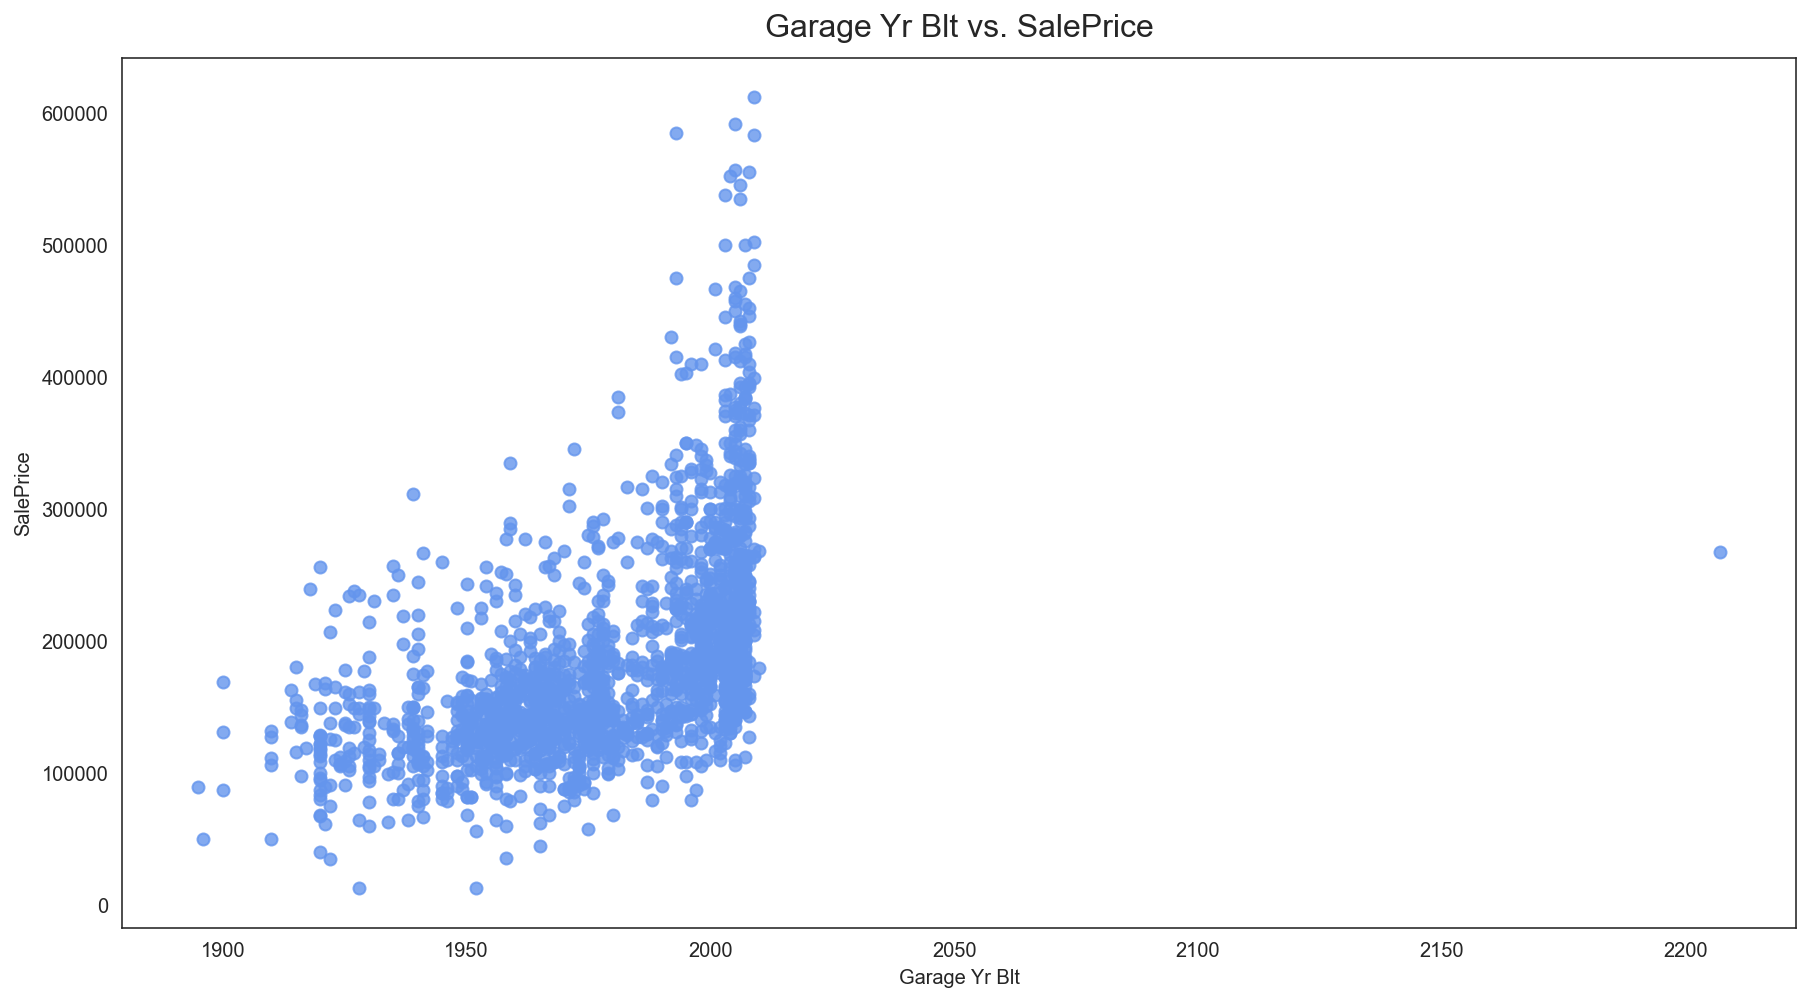

In [80]:
# plotting Garage Yr Blt (for houses with Garage) vs SalePrice

plt.figure(figsize=(15, 8))
g = sns.regplot(data = train[train['Garage Yr Blt']>0] , x='Garage Yr Blt', y='SalePrice', fit_reg=False, color='cornflowerblue');
g.set_title('Garage Yr Blt vs. SalePrice', fontsize=16, y=1.01);

In [81]:
train[train['Garage Yr Blt'] > 2010][['Year Built', 'Year Remod/Add', 'Garage Yr Blt']]

Year Built  Year Remod/Add  Garage Yr Blt
1699        2006            2007           2207

There seems to be an error in the Garage Yr Blt. Let's reassign the Year Remod/Add as Garage Yr Blt.

In [82]:
train.loc[1699, 'Garage Yr Blt'] = 2007

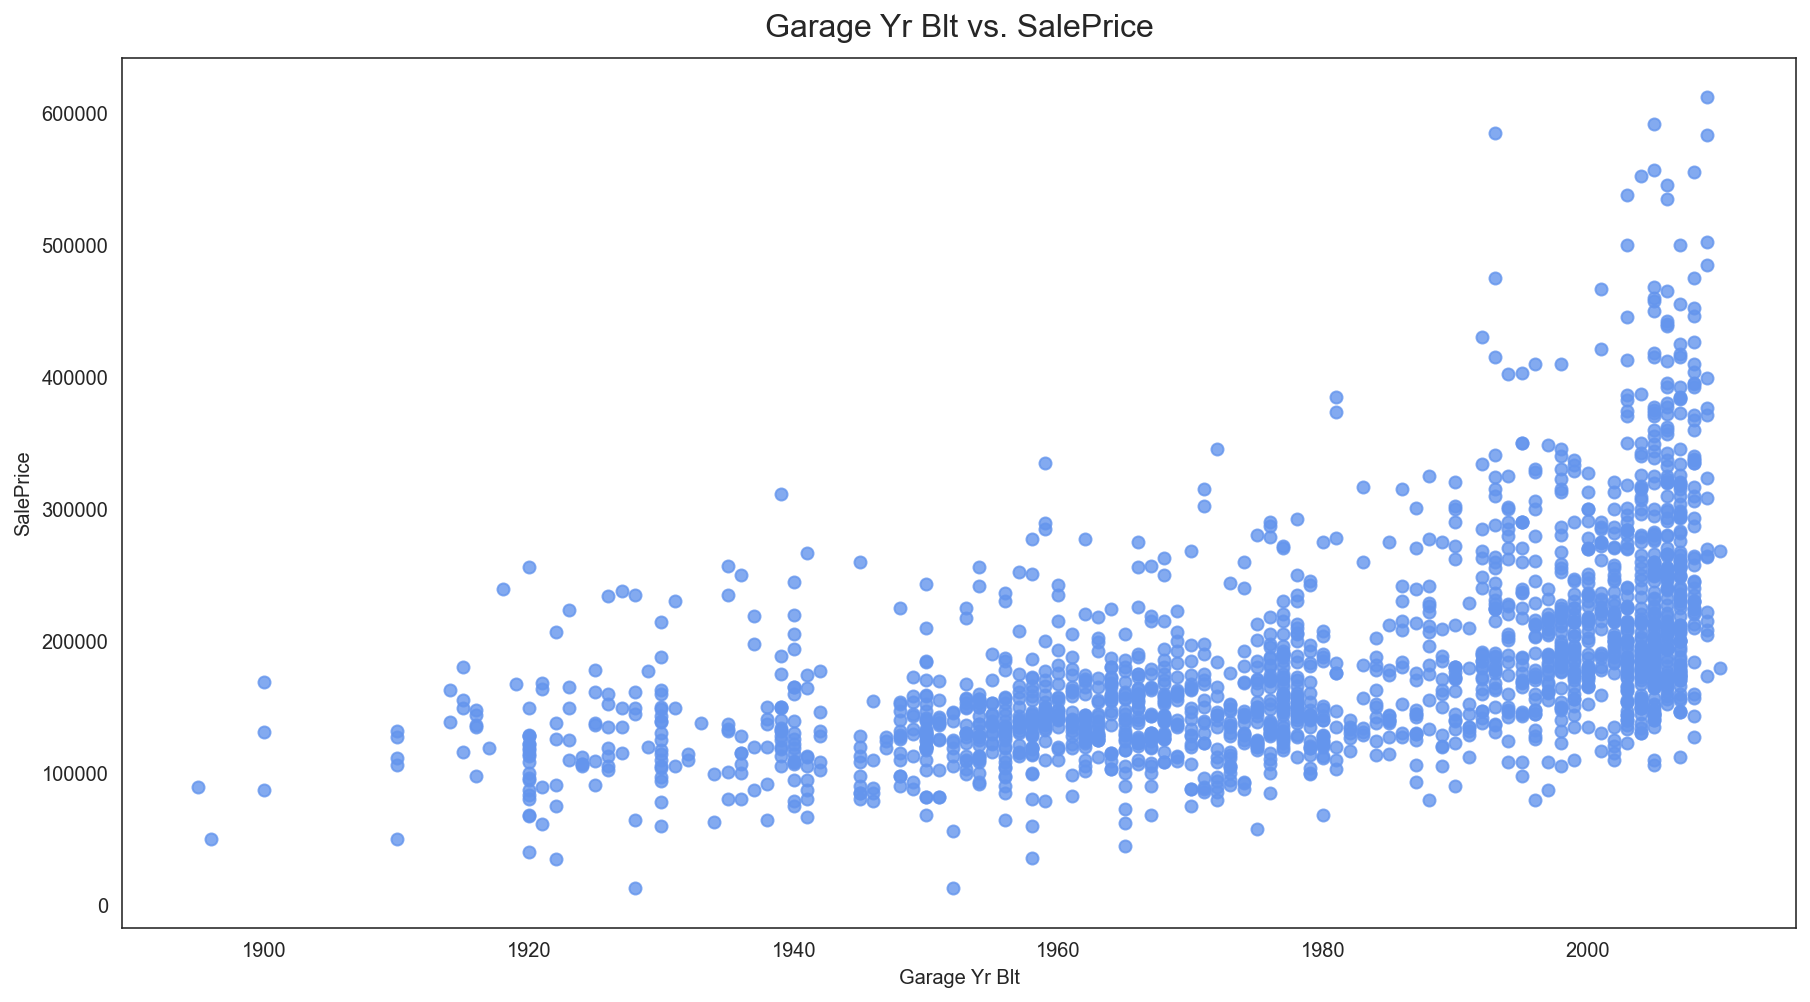

In [83]:
# plotting Garage Yr Blt (for houses with Garage) vs SalePrice again

plt.figure(figsize=(15, 8))
g = sns.regplot(data = train[train['Garage Yr Blt']>0] , x='Garage Yr Blt', y='SalePrice', fit_reg=False, color='cornflowerblue');
g.set_title('Garage Yr Blt vs. SalePrice', fontsize=16, y=1.01);

Notably, houses with  newer garage (built after 1985) seem to be fetching better prices. Something to consider for feature engineering later.

Let's explore the correlation between various numeric variables and 'SalePrice', and see which variables may have strong positive or negative correlation coefficients.

In [84]:
train[numeric_continuous + ['SalePrice']].corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

SalePrice
SalePrice         1.000000
Gr Liv Area       0.697038
Garage Area       0.650241
Total Bsmt SF     0.629303
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Mas Vnr Area      0.503579
BsmtFin SF 1      0.423856
Open Porch SF     0.333476
Wood Deck SF      0.326490
Lot Frontage      0.325129
Lot Area          0.296566
Garage Yr Blt     0.258679
2nd Flr SF        0.248452
Bsmt Unf SF       0.190861
Screen Porch      0.134581
3Ssn Porch        0.048732
Pool Area         0.023106
BsmtFin SF 2      0.016432
Misc Val         -0.007375
Low Qual Fin SF  -0.041594
Enclosed Porch   -0.135656

Notably, the following numeric continuous variables have the strongest correlation with 'SalePrice' (correlation coefficient >= +/-0.5).

1. Gr Liv Area
2. Garage Area
3. Total Bsmt SF
4. 1st Flr SF
5. Year Built
6. Year Remod/Add
7. Mas Vnr Area

Let's take a look at the correlation matrix.

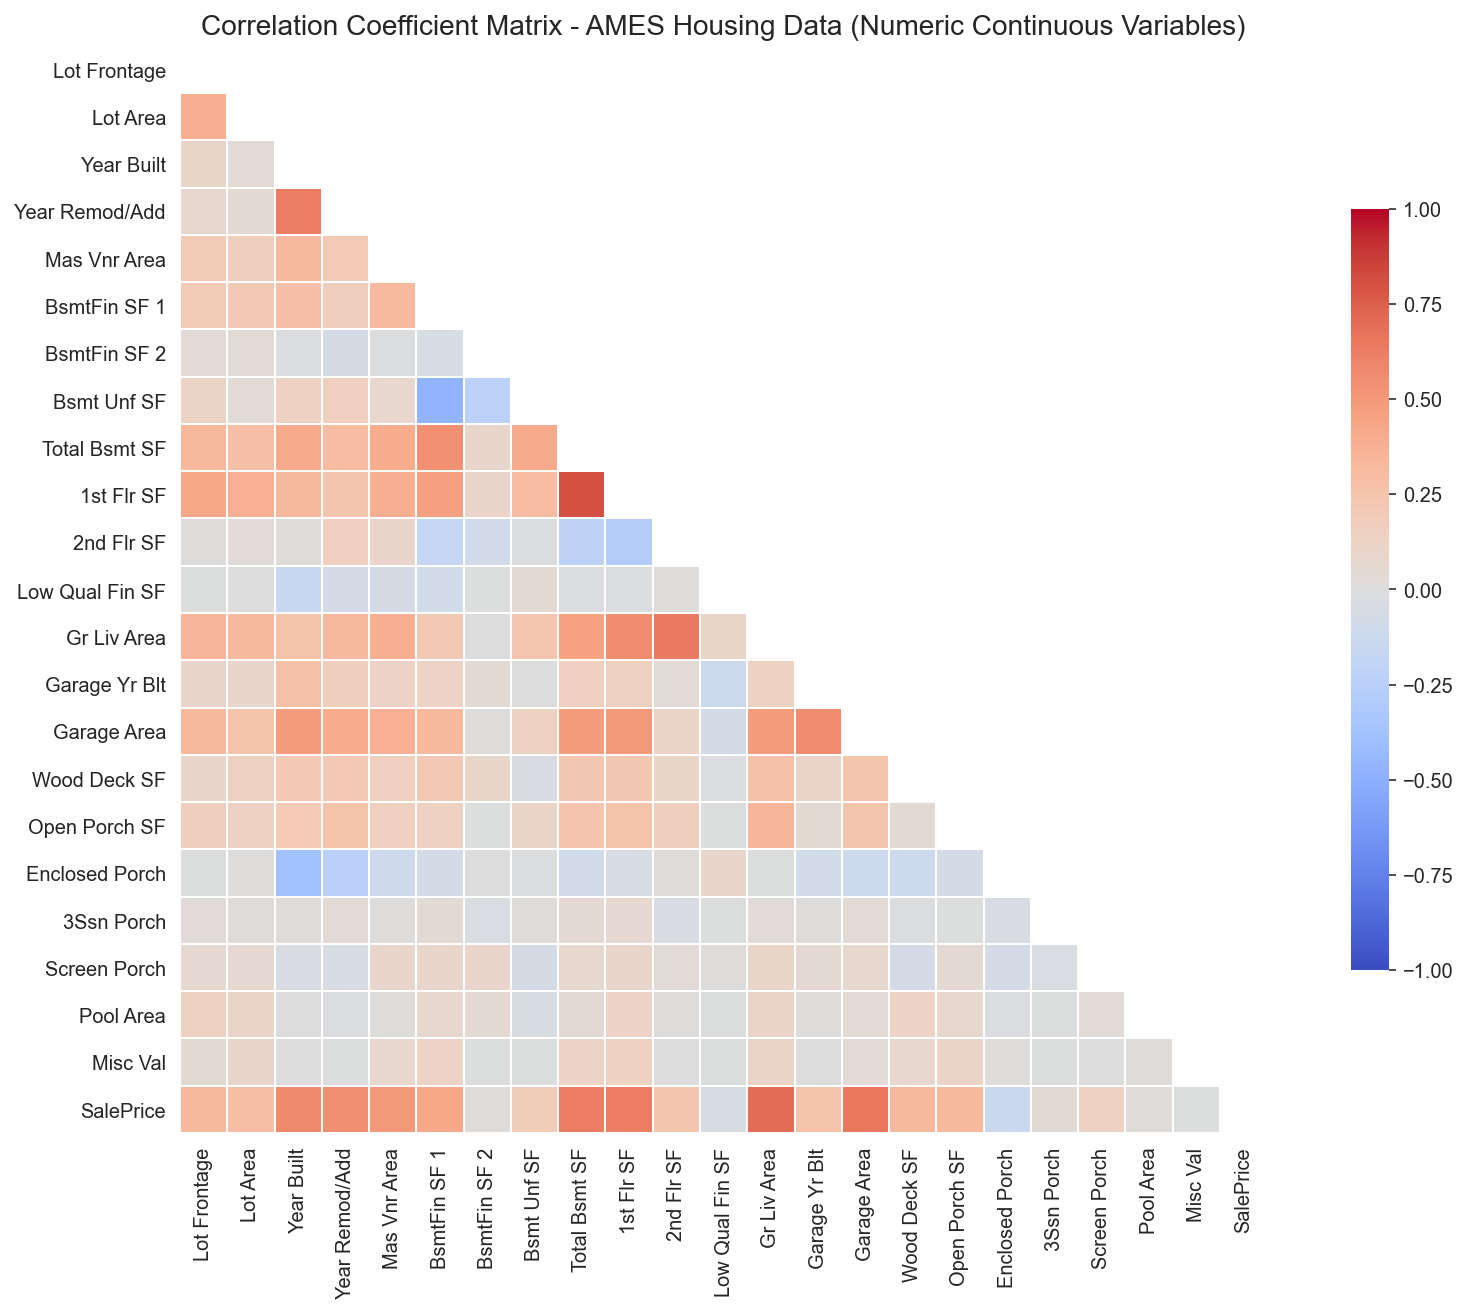

In [85]:
# plotting correlation matrix of numeric continuous variables and SalePrice
fig, ax = plt.subplots(figsize=(15,10))

corr = train[numeric_continuous + ['SalePrice']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})
g.set_title('Correlation Coefficient Matrix - AMES Housing Data (Numeric Continuous Variables)', fontsize=14);

Let's visualise the distribution of these numeric continuous variables.

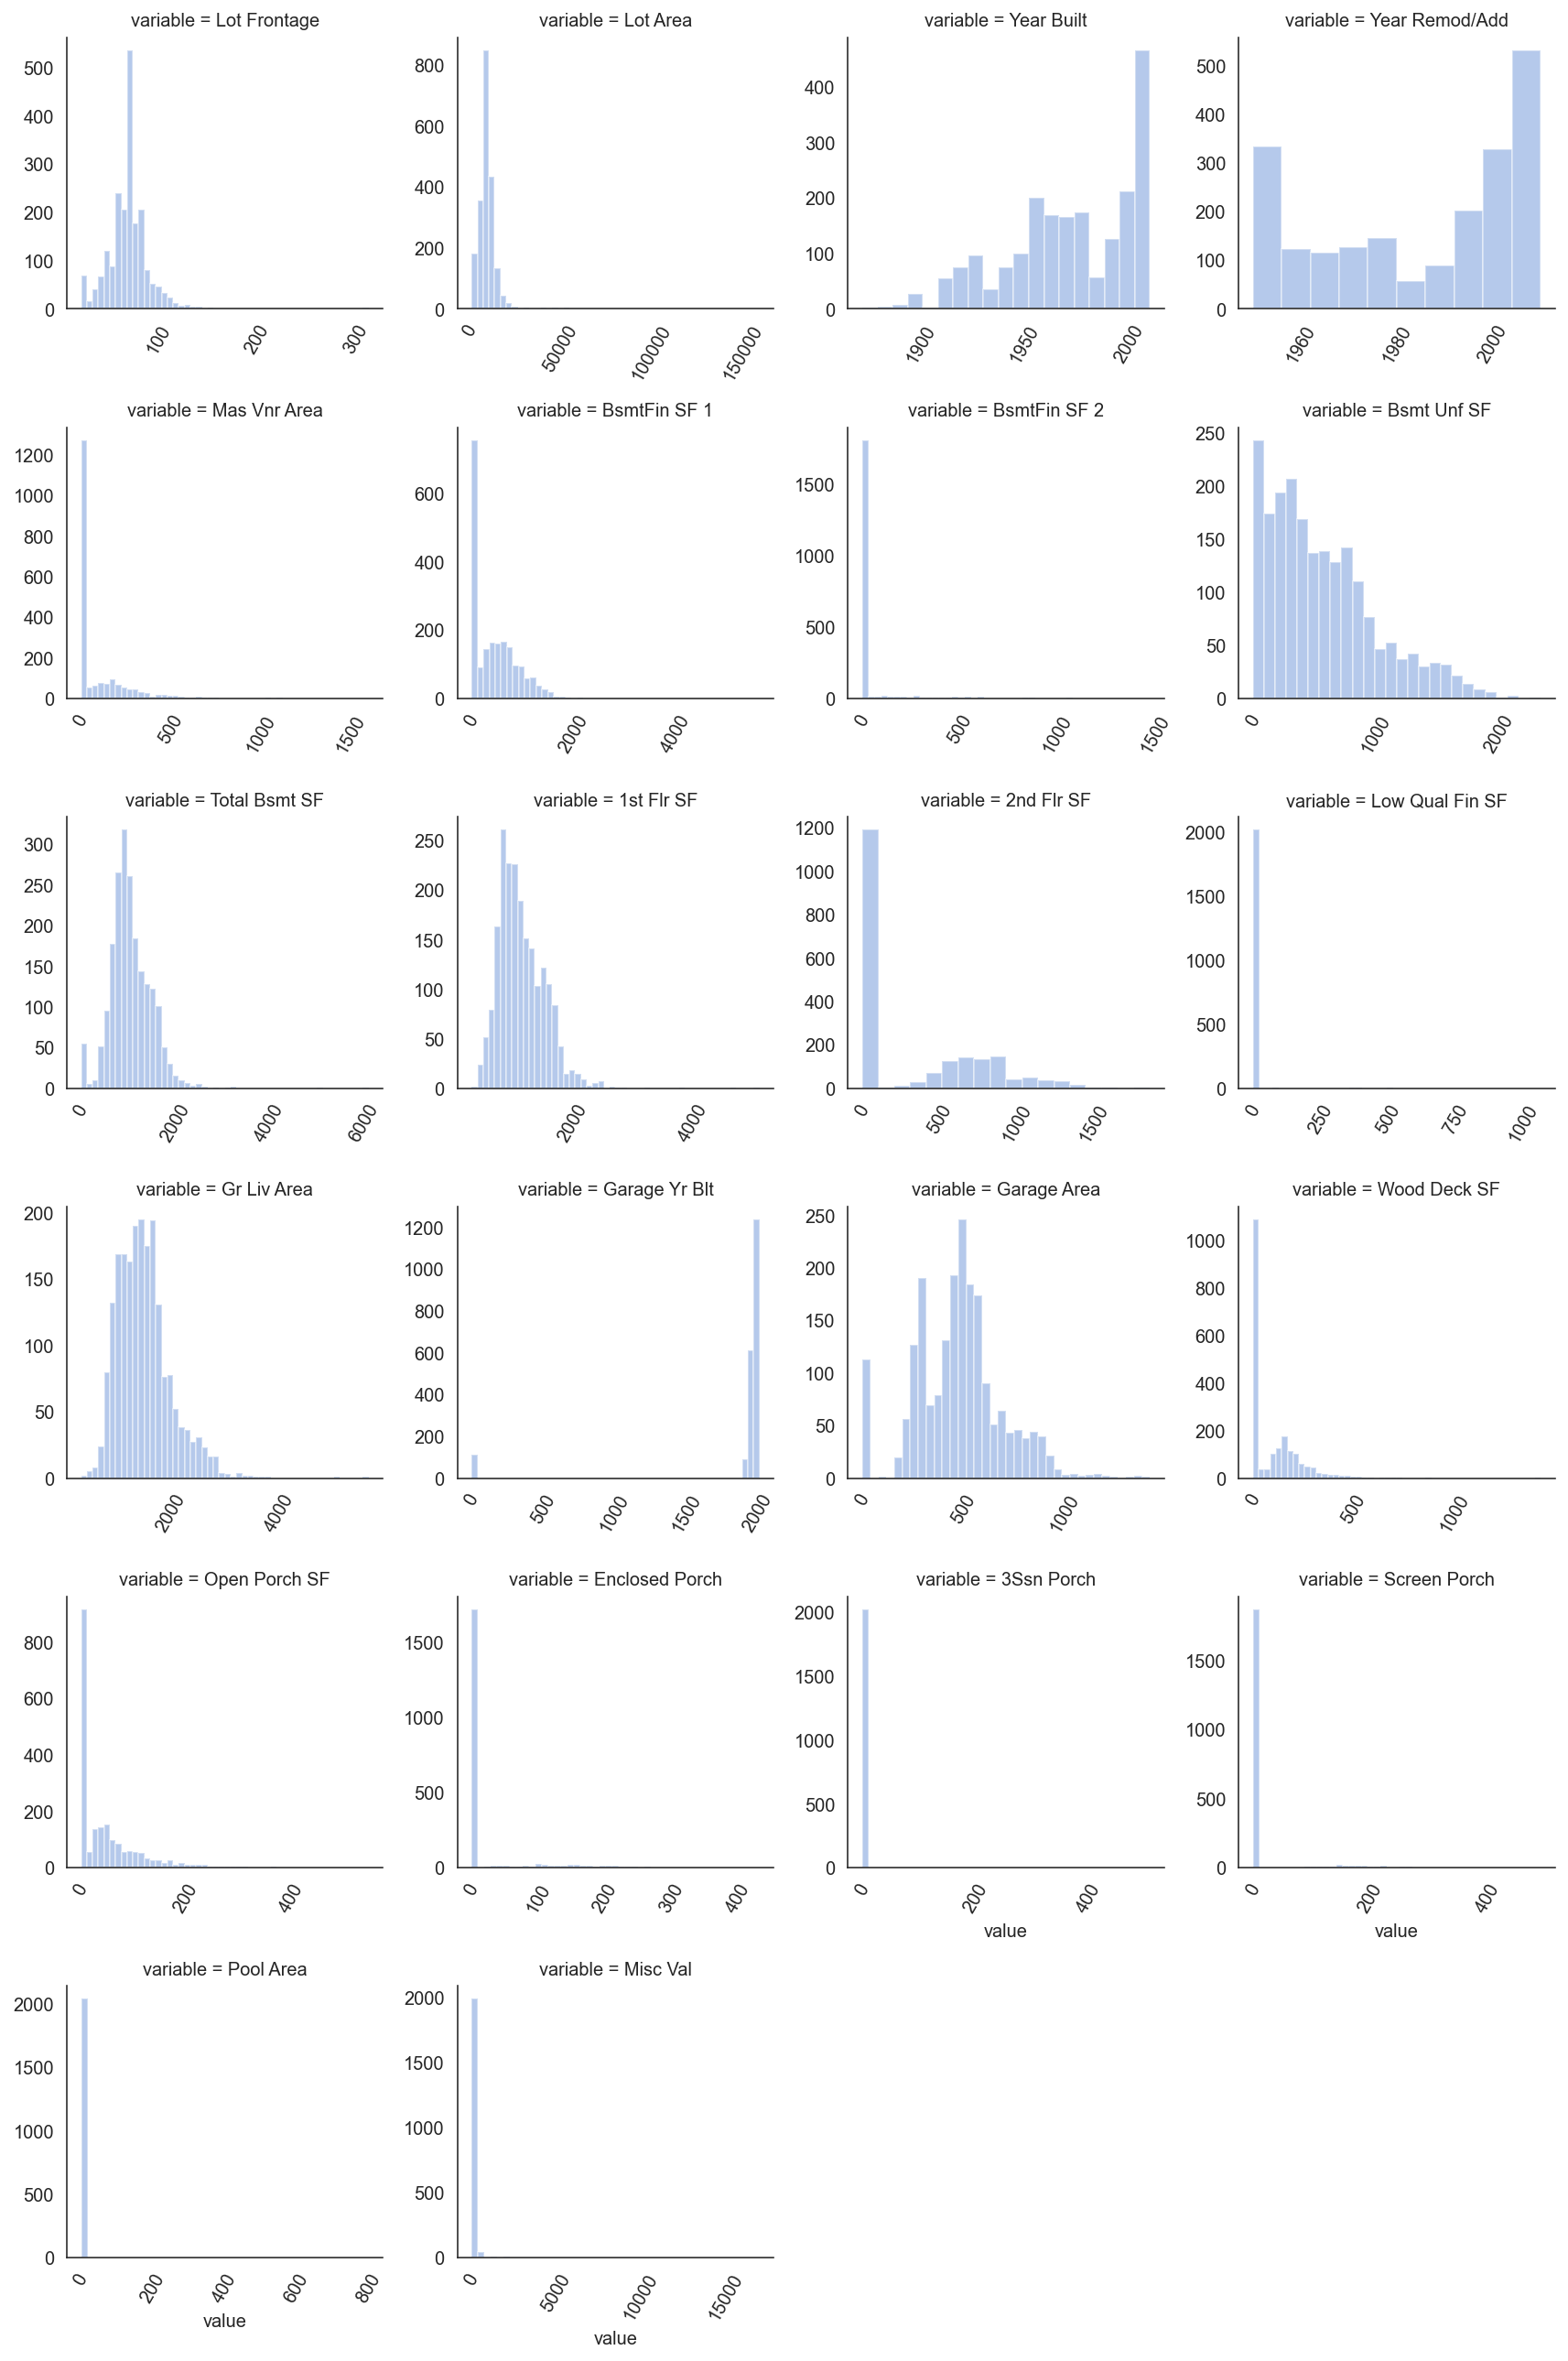

In [86]:
# plotting distplots of numeric continuous variables
data = pd.melt(train, value_vars=numeric_continuous)
g = sns.FacetGrid(data, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.distplot, 'value', kde=False)
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()

Notably, the distribution of most of the numeric continuous variables are skewed. 

Next, let's also visualise the numeric continuous variables vs. SalePrice with scatterplots.

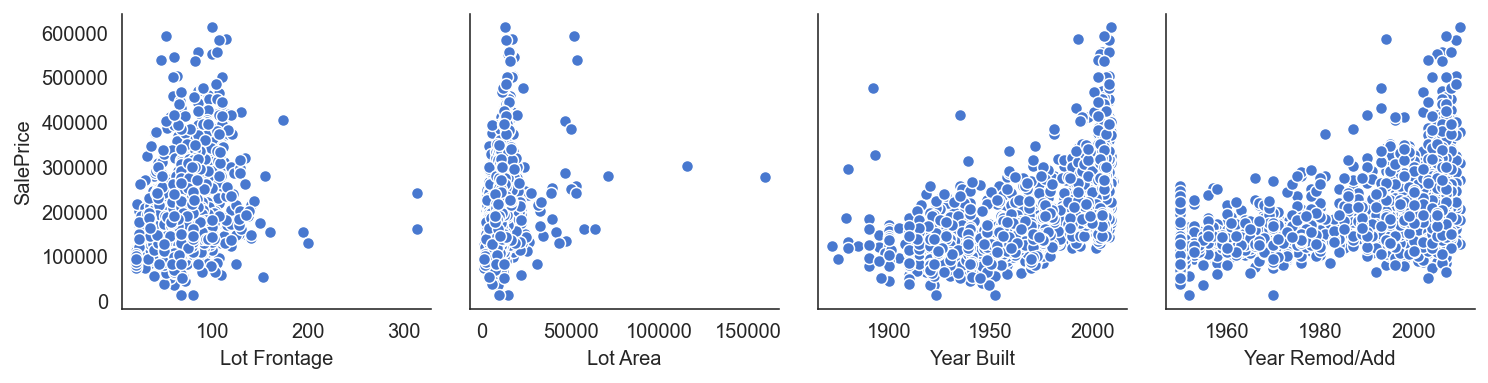

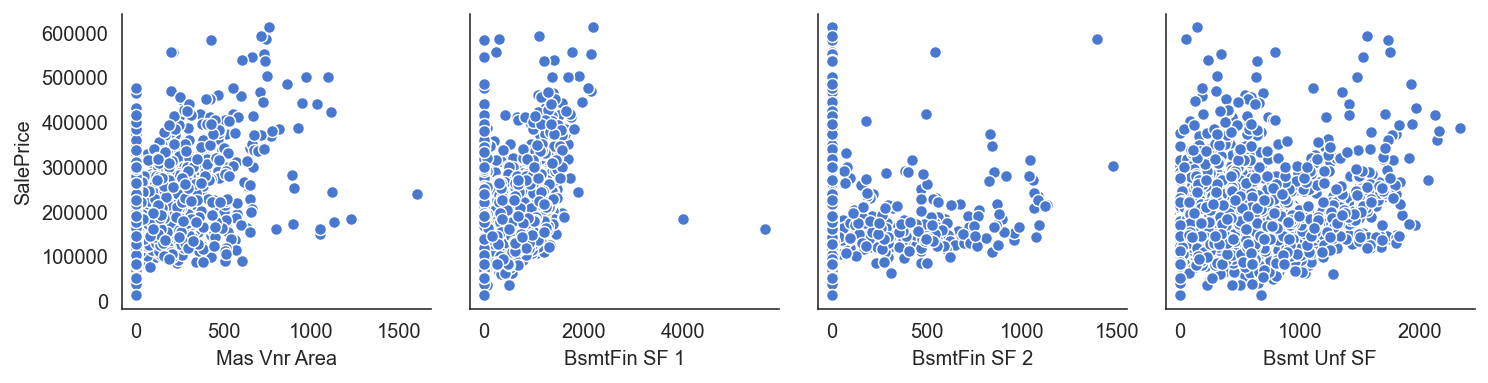

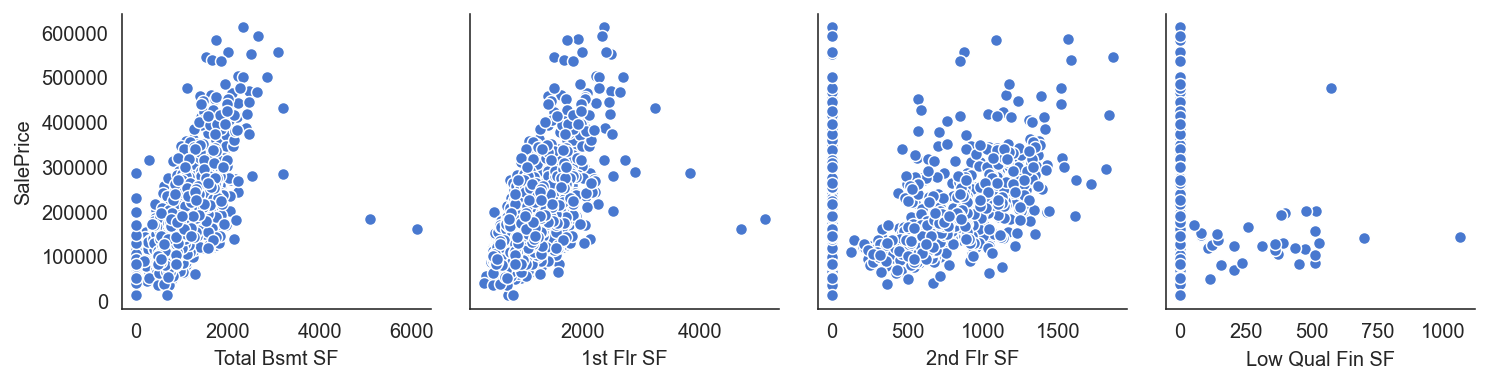

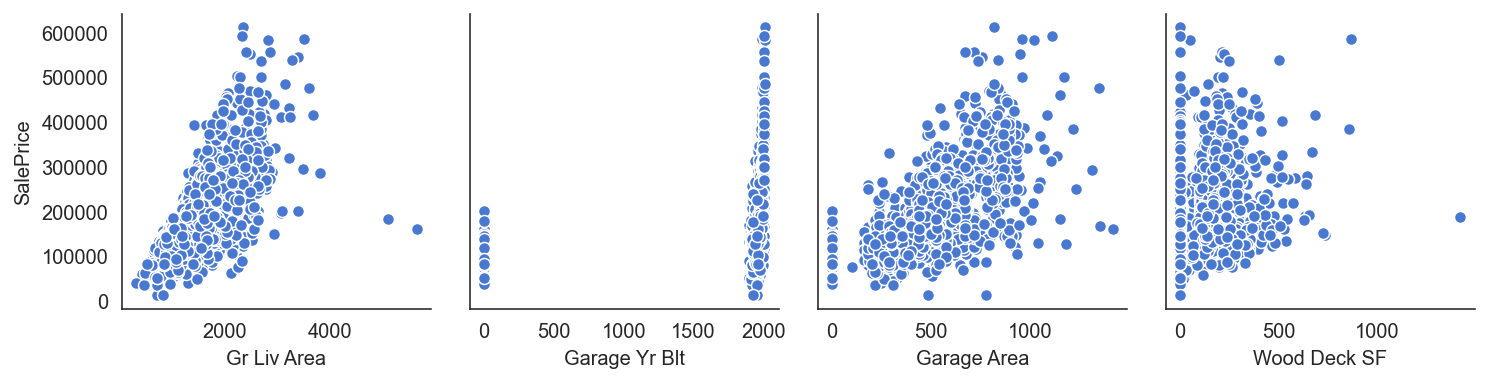

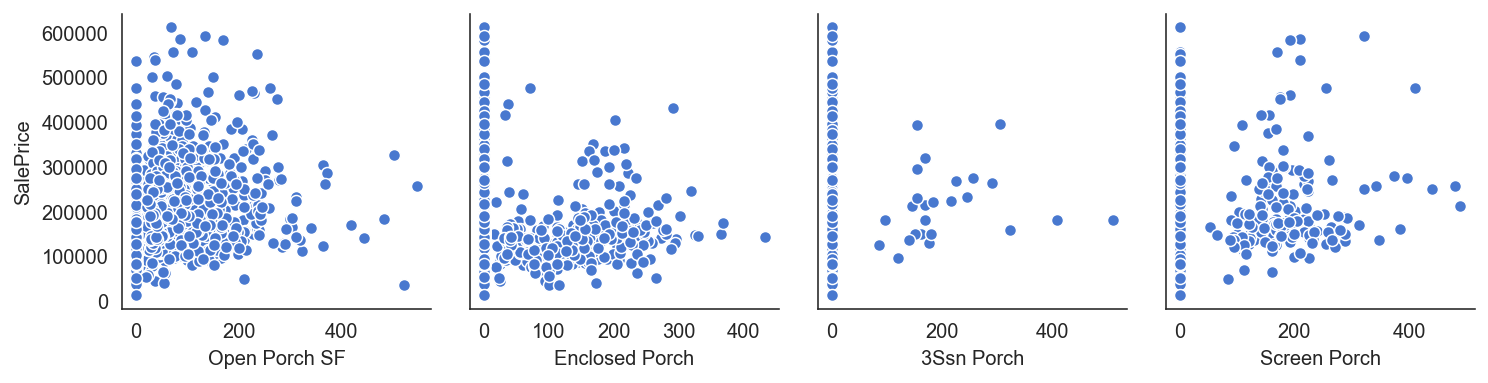

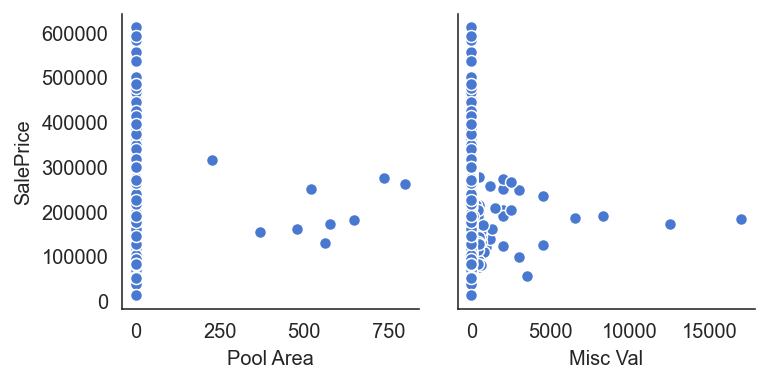

In [87]:
# plotting scatterplots of numeric continuous variables vs. SalePrice 
for i in range(0, len(numeric_continuous), 4):
    sns.pairplot(data=train, x_vars=numeric_continuous[i:i+4], y_vars=['SalePrice'])

Several numeric continuous variables as mentioned earlier show correlation with SalesPrice. Others such as Pool Area, Screen Porch have high number of zeros corresponding to lack of these house features.

Let's explore the numeric continuous variables with high correlation to SalePrice further.

In [88]:
numeric_continuous_highcorr = ['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area']

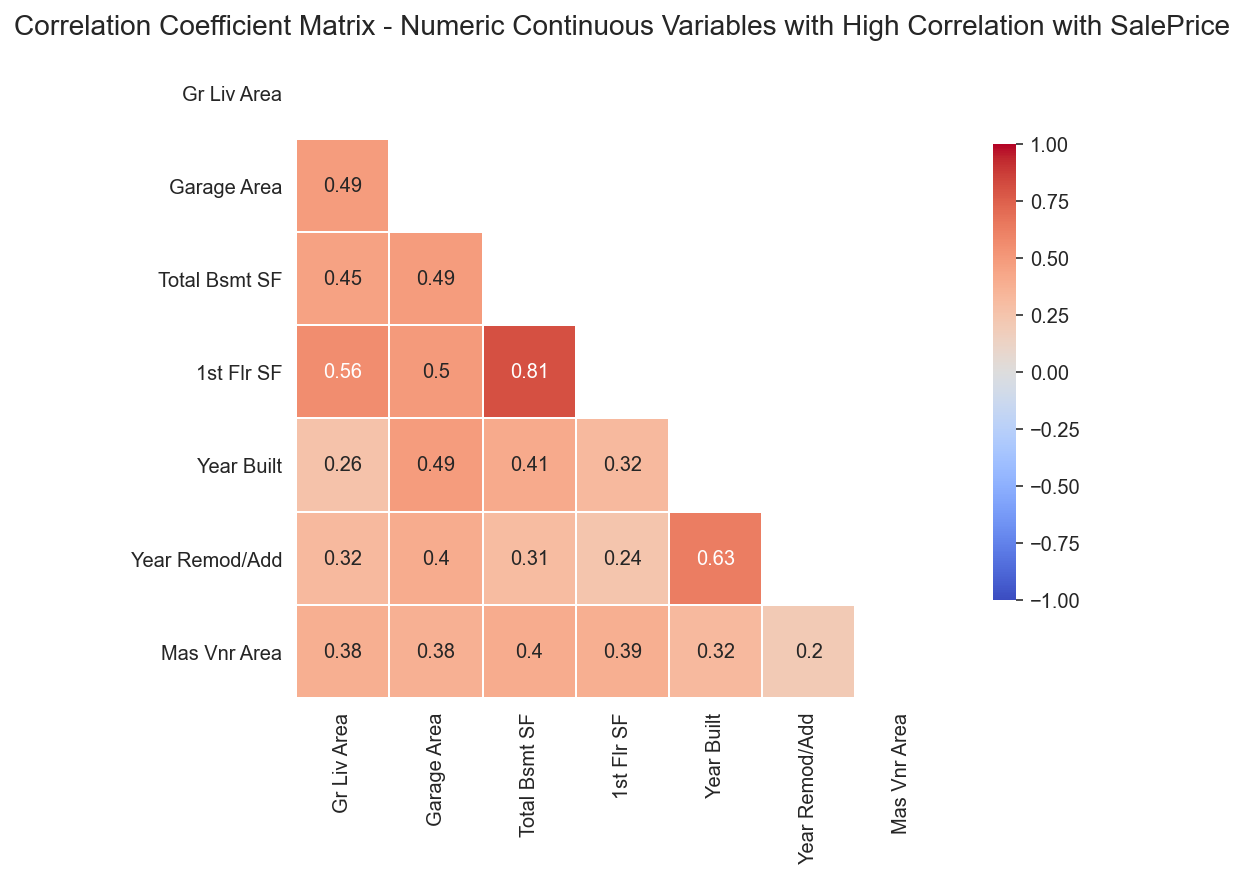

In [89]:
# plotting correlation matrix of selected numeric continuous variables with high correlation with SalePrice
fig, ax = plt.subplots(figsize=(8,6))

corr = train[numeric_continuous_highcorr].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})
g.set_title('Correlation Coefficient Matrix - Numeric Continuous Variables with High Correlation with SalePrice', fontsize=14);

Noting multicollinearity (correlation coefficient > +/-0.5), the model should not include:

* 1st Flr SF with Total Bsmt SF
* Year Remod/Add with Year Built

In fact, looking into the data dictionary, it is noted that many of the features related to area are related. 

Let's explore feature engineering to combine these area and year-related features.

In addition, let's see the scatterplots of some of these key numeric continuous variables.

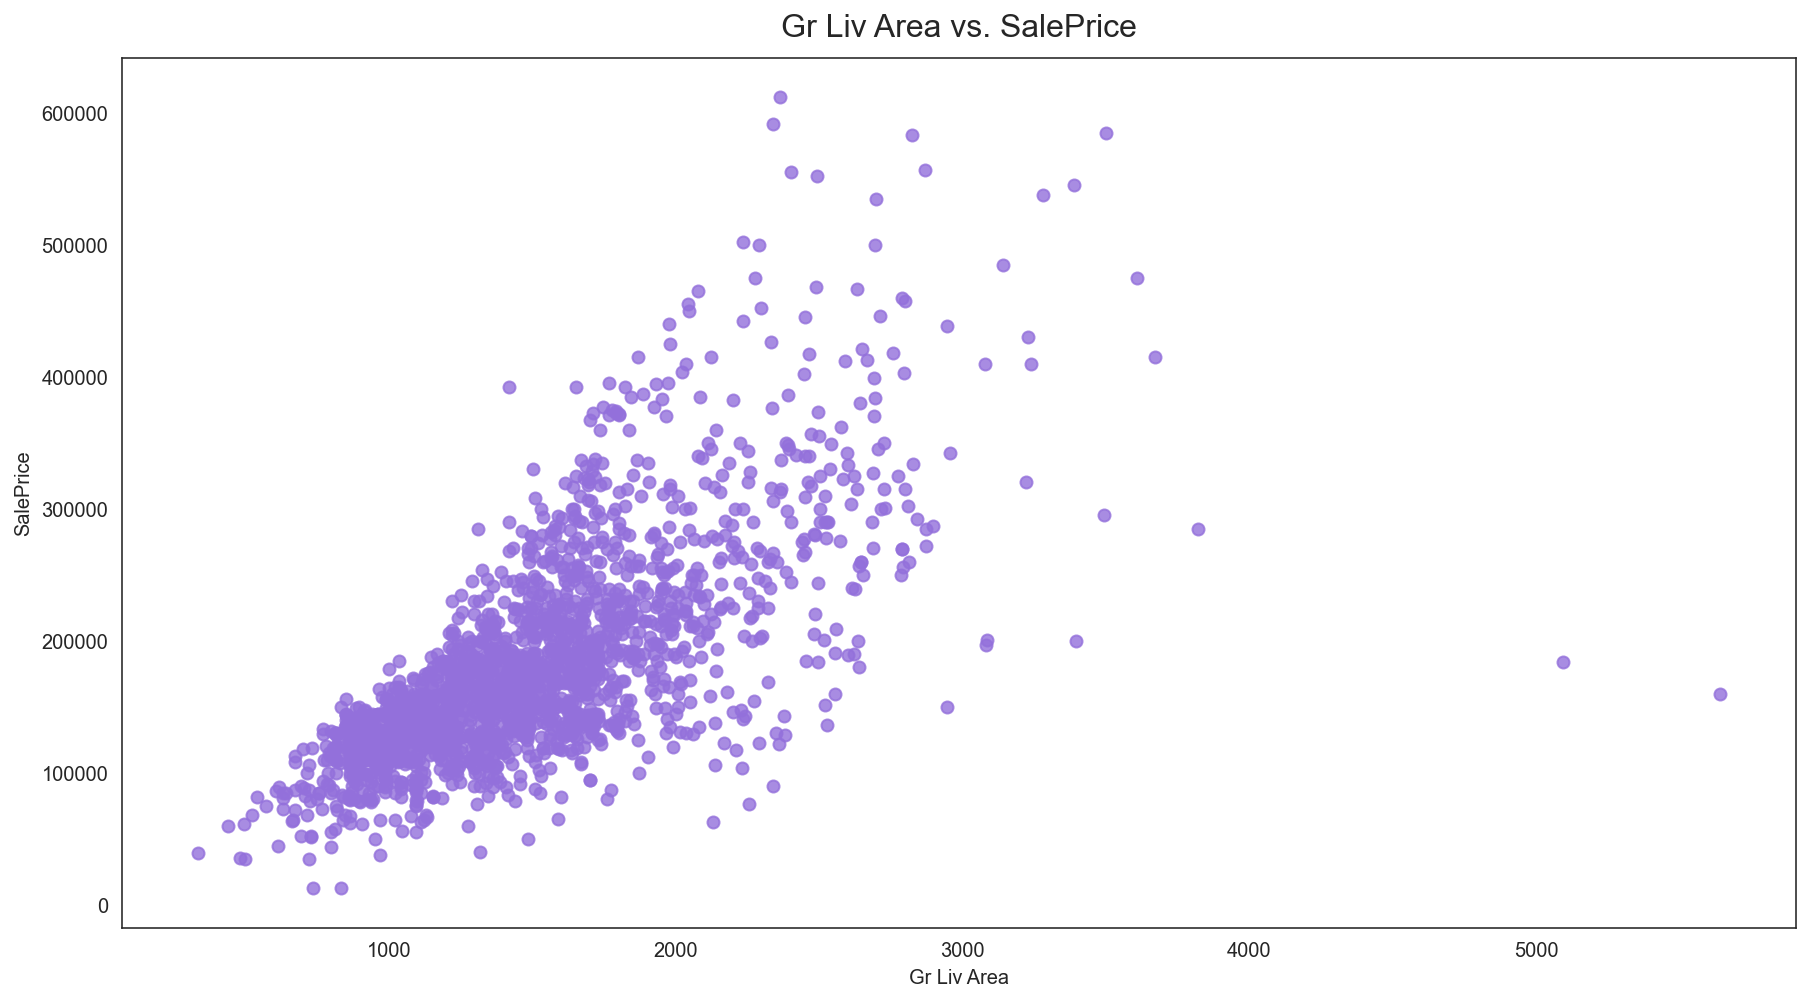

In [90]:
# plotting Gr Liv Area vs SalePrice 
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='Gr Liv Area', y='SalePrice', fit_reg=False, color='mediumpurple');
g.set_title('Gr Liv Area vs. SalePrice', fontsize=16, y=1.01);

There seem to be 2 outliers with Gr Liv Area >5000. Let's keep these for now and remove after the new area-related feature is created.

Let's also take a look at the variable Year Built.

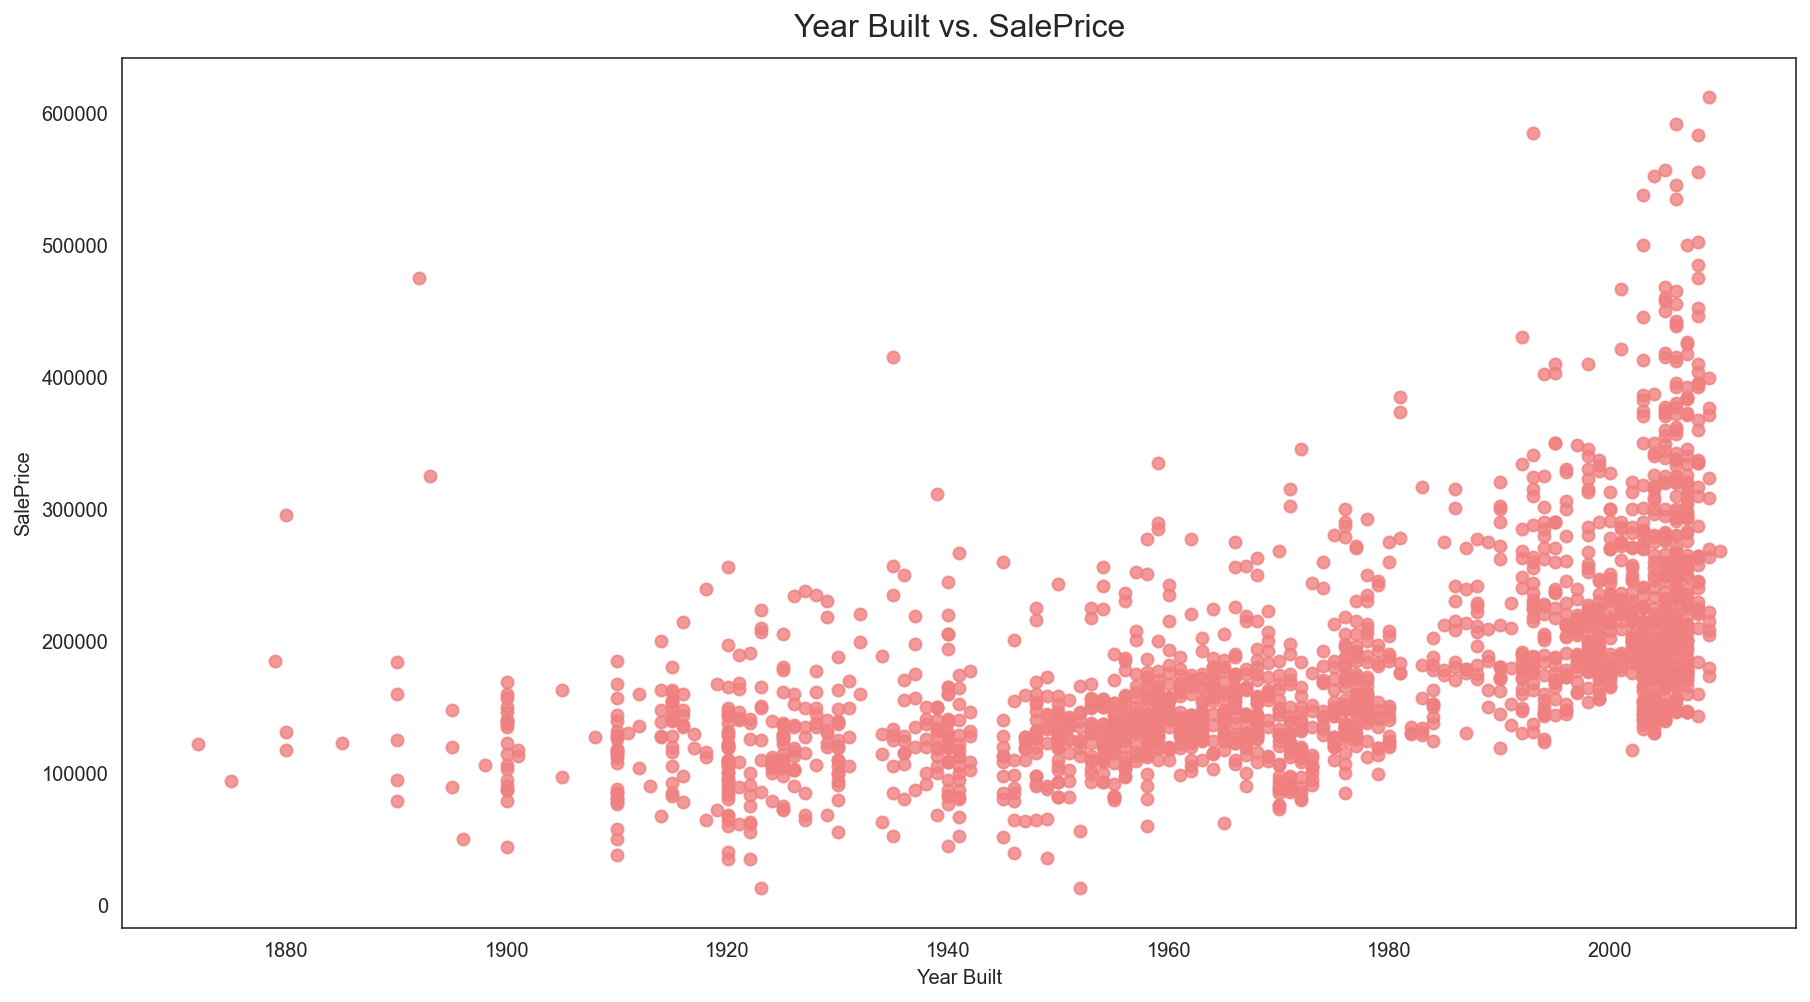

In [91]:
# plotting Year Built vs SalePrice
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='Year Built', y='SalePrice', fit_reg=False, color='lightcoral');
g.set_title('Year Built vs. SalePrice', fontsize=16, y=1.01);

Similar to Garage Yr Blt, there seems to be a pattern for houses with Year Built > 1985 to fetch better SalePrice.

#### 2.6.3 Numeric Variables - Categorical

Next, let's explore the numerical categorical variables.

In [92]:
train[numeric_cat + ['SalePrice']].corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

SalePrice
SalePrice        1.000000
Overall Qual     0.800207
Exter Qual       0.712146
Kitchen Qual     0.692336
Garage Cars      0.648128
Bsmt Qual        0.612188
Garage Finish    0.558042
Fireplace Qu     0.538925
Full Bath        0.537969
TotRms AbvGrd    0.504014
Fireplaces       0.471093
Heating QC       0.458354
Bsmt Exposure    0.425934
BsmtFin Type 1   0.350362
Paved Drive      0.290472
Garage Qual      0.285547
Bsmt Full Bath   0.283332
Half Bath        0.283001
Garage Cond      0.265227
Electrical       0.247842
Bsmt Cond        0.225075
Bedroom AbvGr    0.137067
Functional       0.125682
Exter Cond       0.036418
Pool QC          0.030585
Utilities        0.026404
BsmtFin Type 2   0.016058
Yr Sold         -0.015203
Bsmt Half Bath  -0.045290
Land Slope      -0.057990
Overall Cond    -0.097019
Kitchen AbvGr   -0.125444
Fence           -0.159060
Lot Shape       -0.294542

Numeric categorical variables with strong correlation with SalePrice (correlation >= +/-0.5) include:

1. Overall Qual
2. Exter Qual
3. Kitchen Qual
4. Garage Cars
5. Bsmt Qual
6. Garage Finish
7. Fireplace Qu
8. Full Bath
9. TotRms AbvGrd

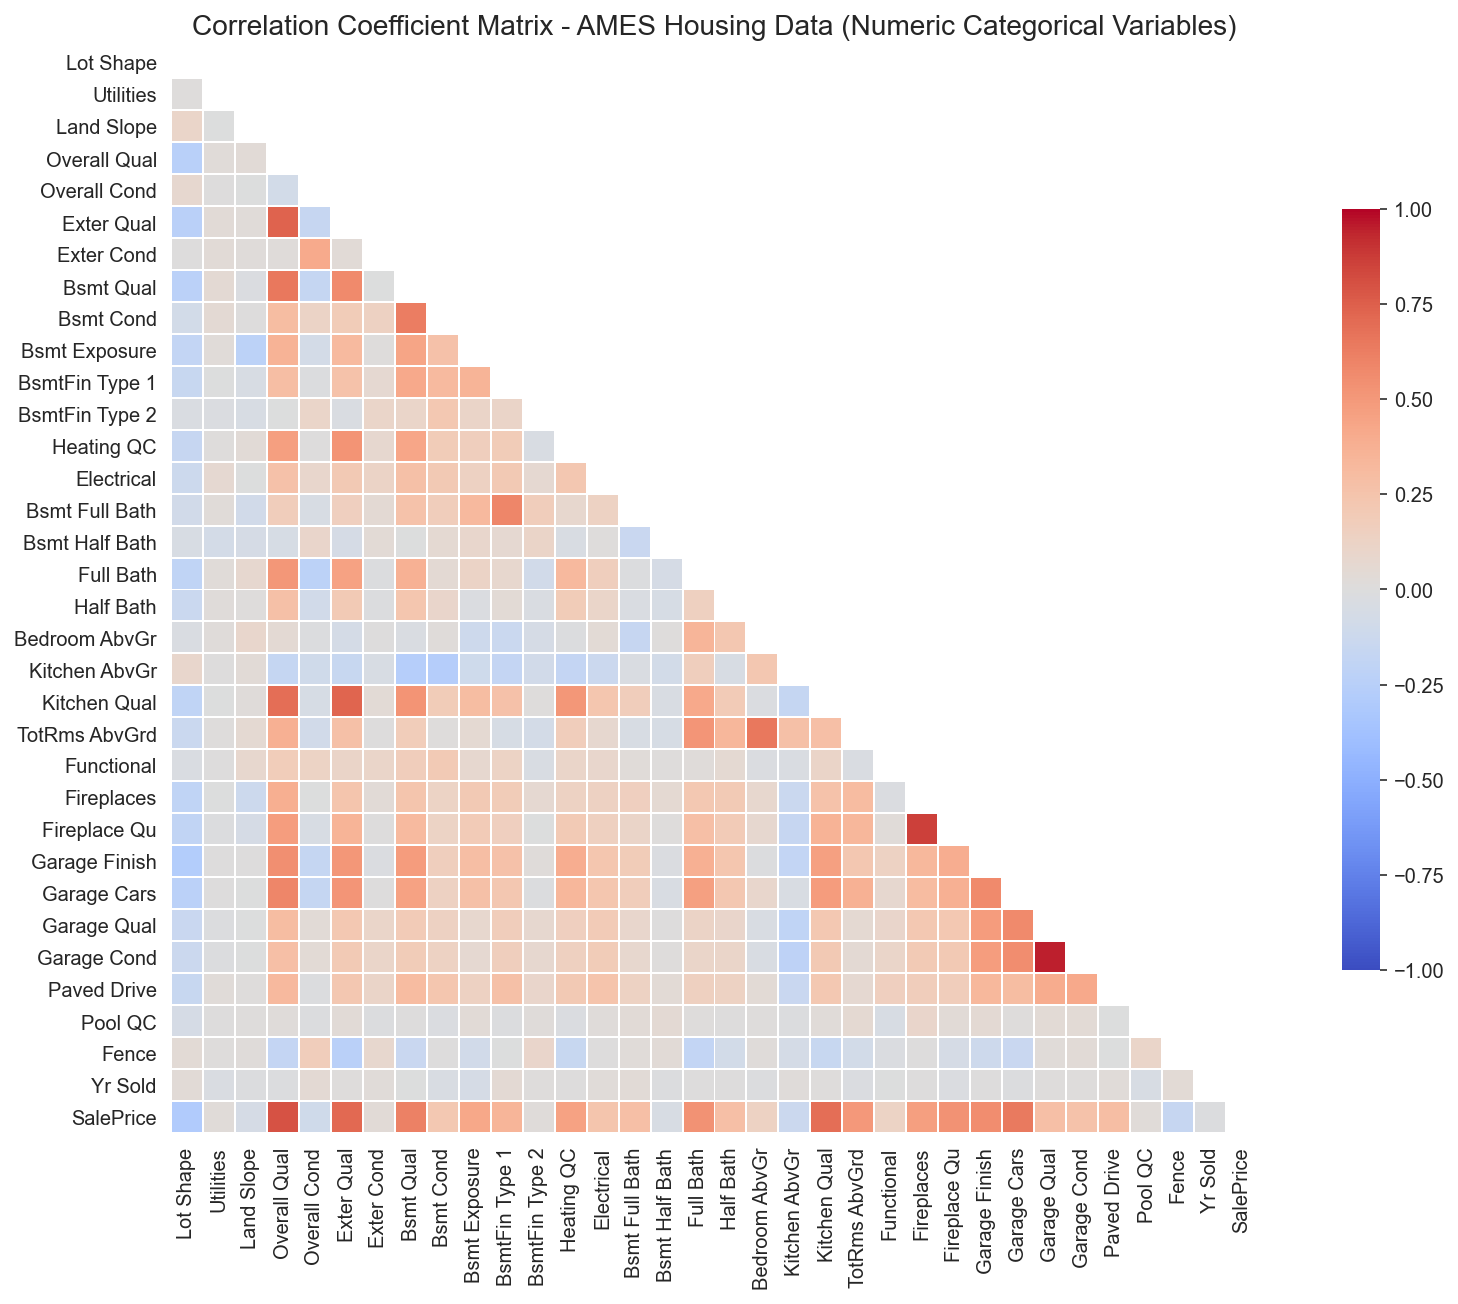

In [93]:
# plotting correlation matrix for numeric categorical variables & SalePrice
fig, ax = plt.subplots(figsize=(15,10))

corr = train[numeric_cat+ ['SalePrice']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})
g.set_title('Correlation Coefficient Matrix - AMES Housing Data (Numeric Categorical Variables)', fontsize=14);

Focusing on those with strong correlation with SalePrice:

In [94]:
numeric_cat_highcorr = ['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Garage Cars', 'Bsmt Qual', 
                        'Garage Finish', 'Fireplace Qu', 'Full Bath', 'TotRms AbvGrd']

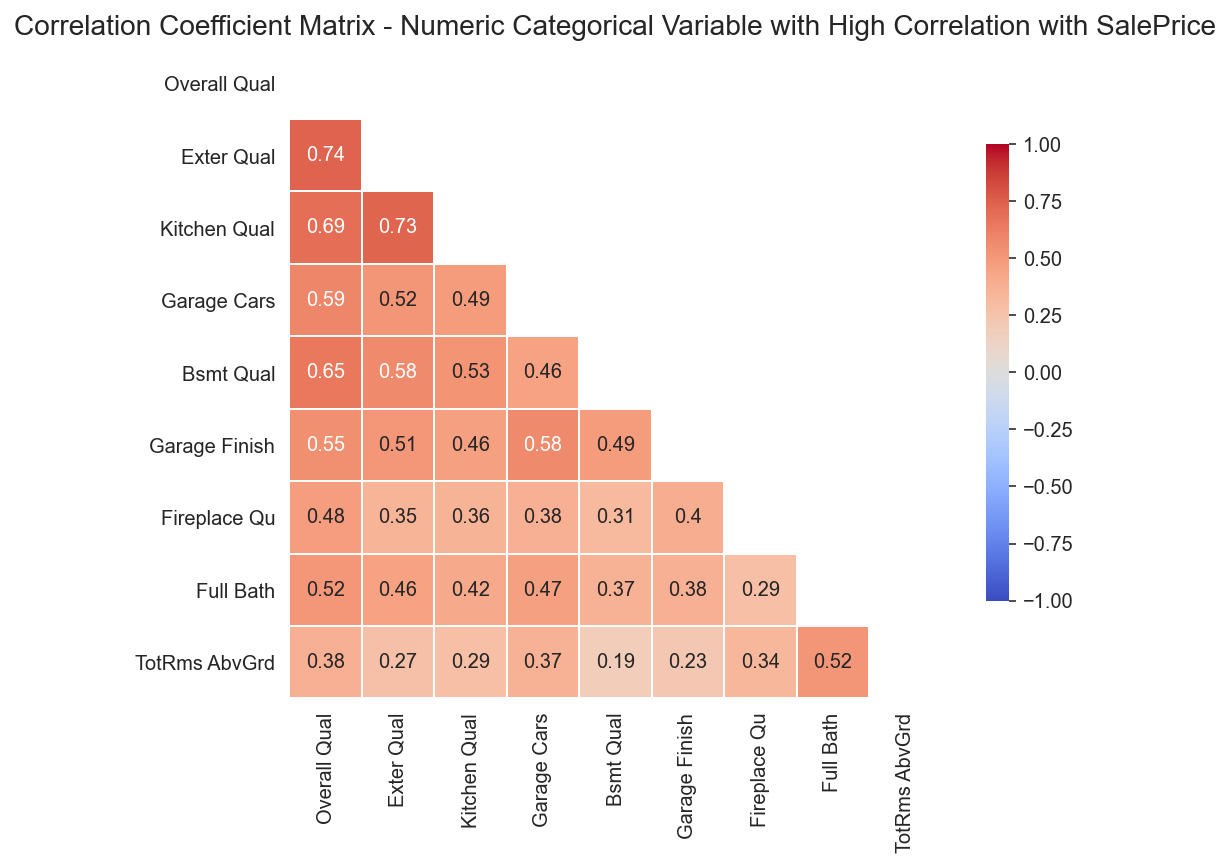

In [95]:
# plotting correlation matrix of selected numeric categorical variables with high correlation with SalePrice
fig, ax = plt.subplots(figsize=(8,6))

corr = train[numeric_cat_highcorr].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})
g.set_title('Correlation Coefficient Matrix - Numeric Categorical Variable with High Correlation with SalePrice', fontsize=14);

Again, a number of these numeric categorical variables show some correlation.

* Overall Qual, Exter Qual, Kitchen Qual and Bsmt Qual
* Garage Cars and Garage Finish

For the various quality measurements, checking against the data dictionary, they are measuring different things (e.g. Exter Qual refers to the quality of the material on the exterior, while Bsmt Qual evaluates the height of the basement. So let's keep them in the model.

Similarly, Garage Finish and Garage Cars measures different things. Garage Finish refers to the interior finish of the garage, while Garage Cars refers to the size of the garage. Again, let's keep them for now.

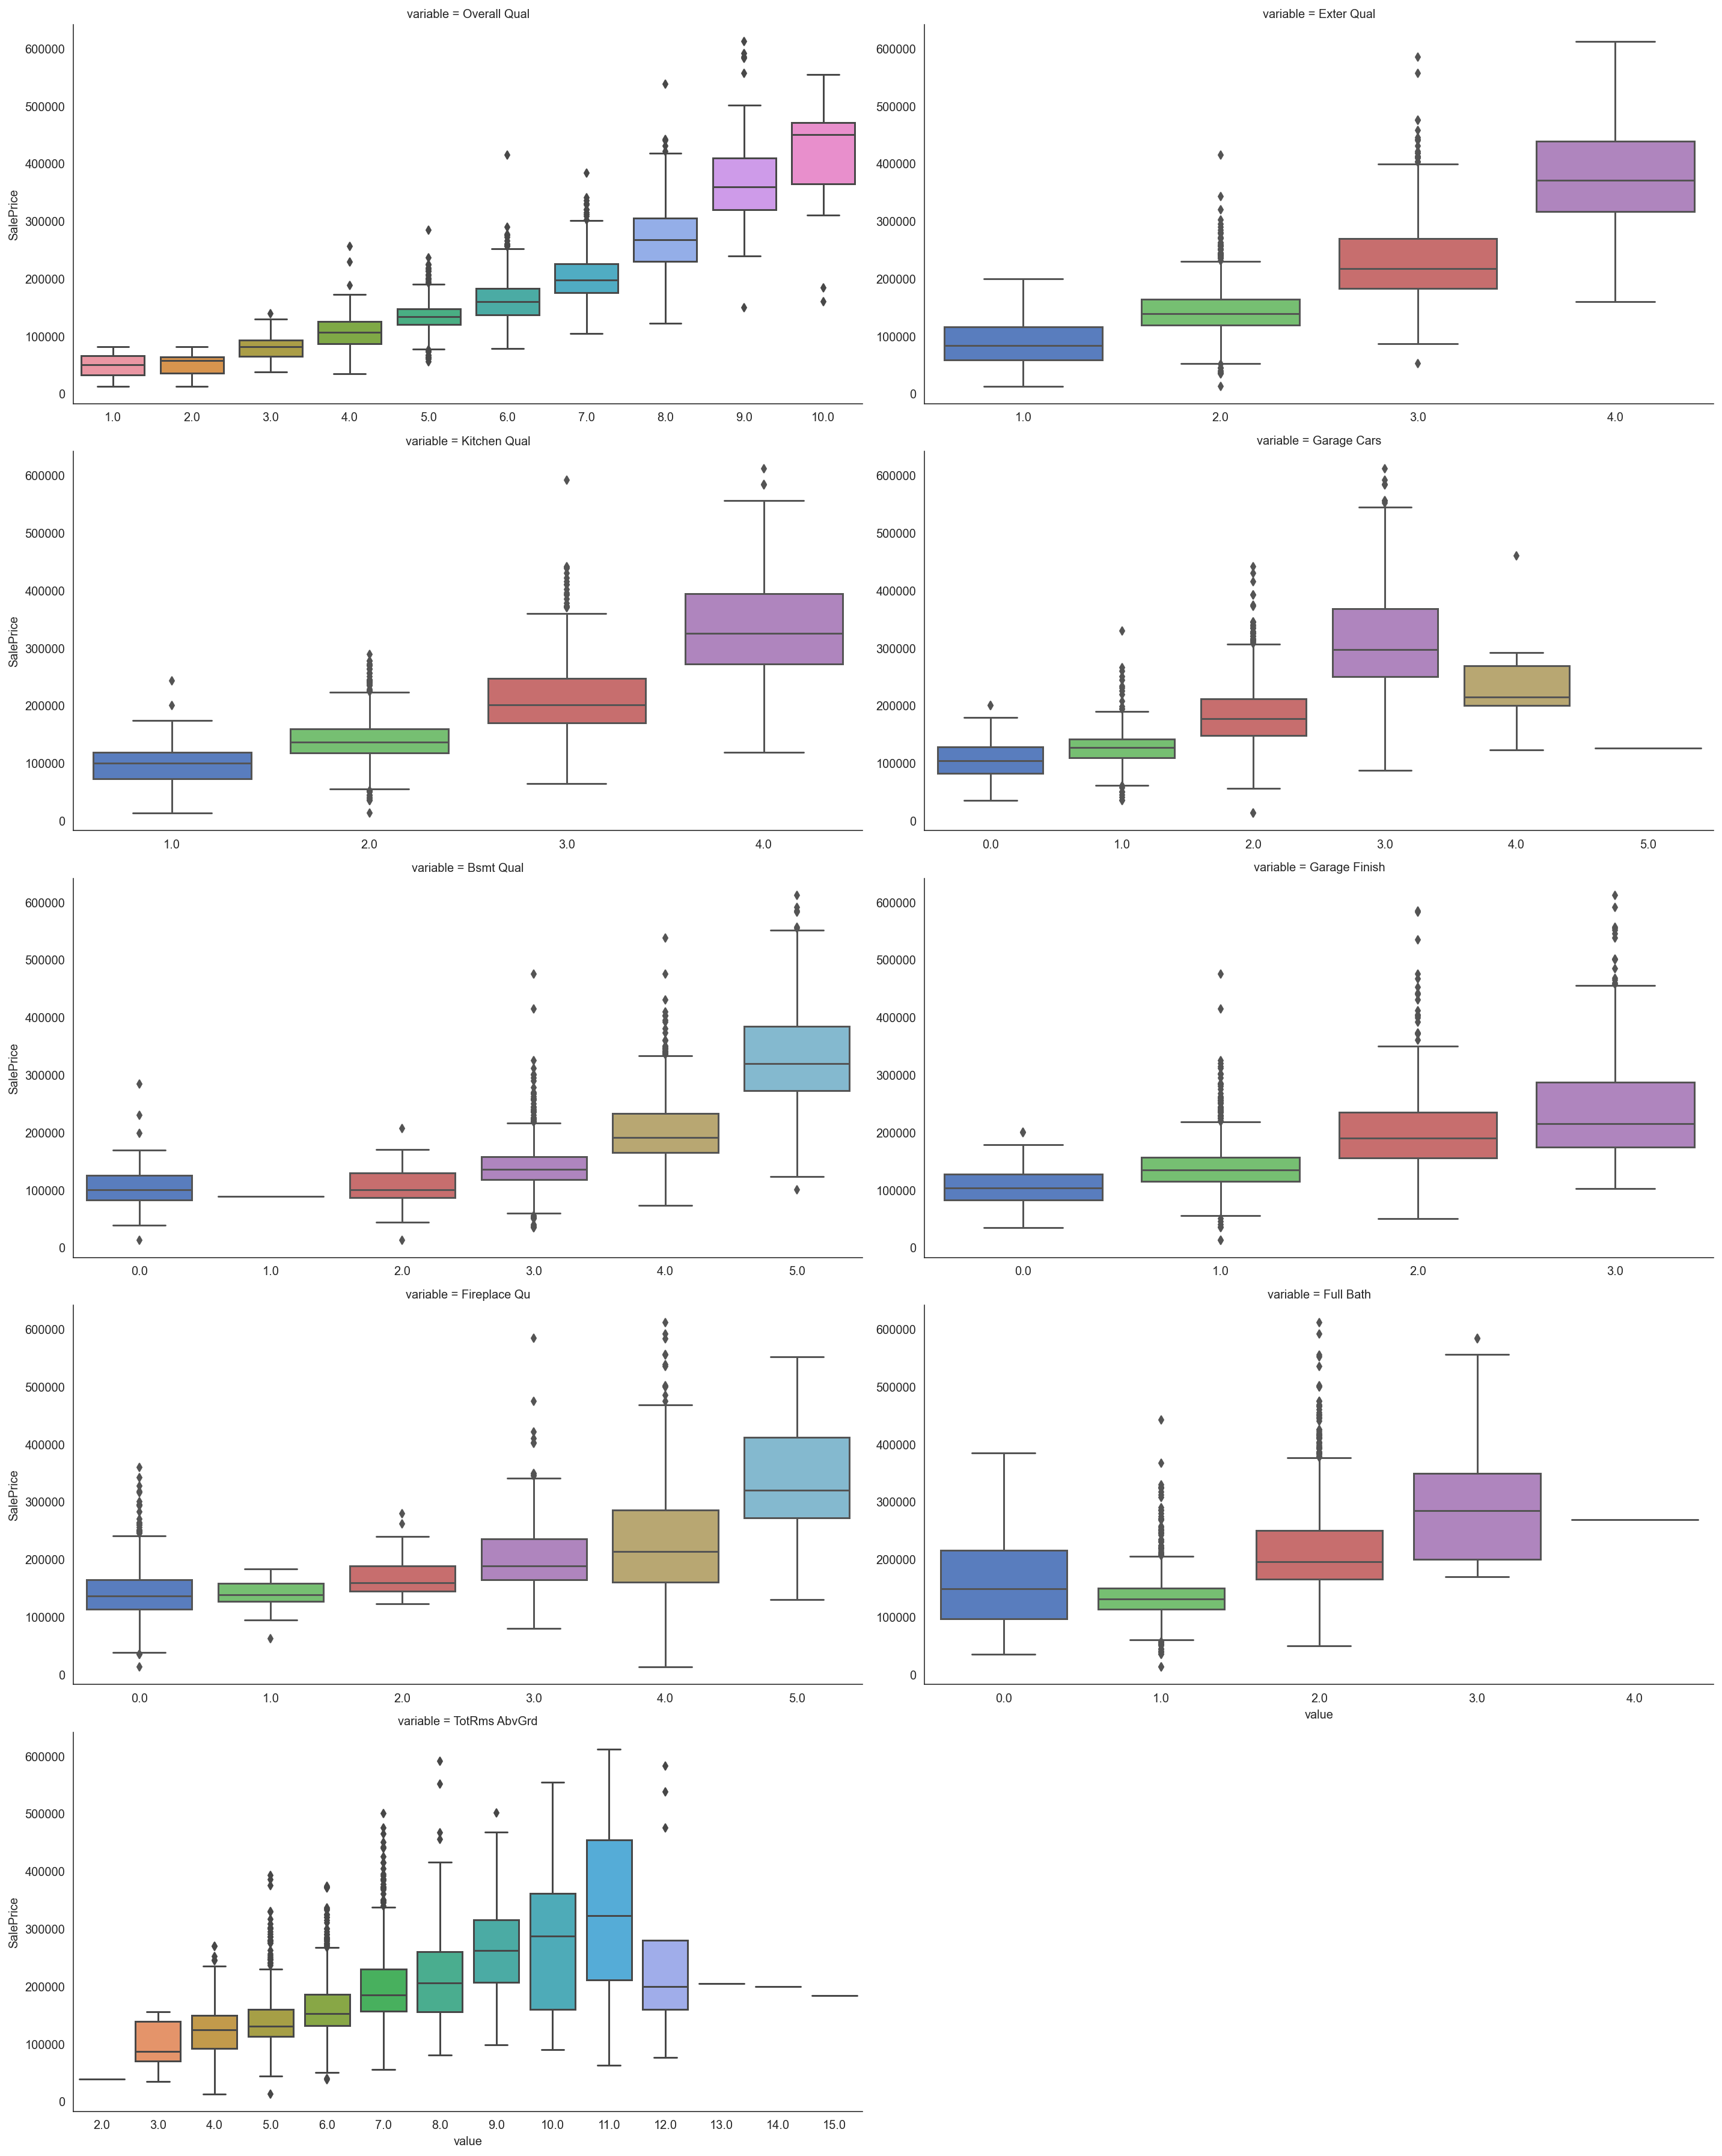

In [96]:
# plotting boxplots of numeric categorical variables vs. SalePrice
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=numeric_cat_highcorr)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, aspect=2, height=5)
g = g.map(boxplot, "value", "SalePrice")

Corresponding to the correlation coefficients, SalePrice increases with higher score on several of the quality-related features e.g. Overall Qual. 

#### 2.6.4 Nominal Categorical Variables

Finally, let's take a look at the nominal categorical variables and their distributions.

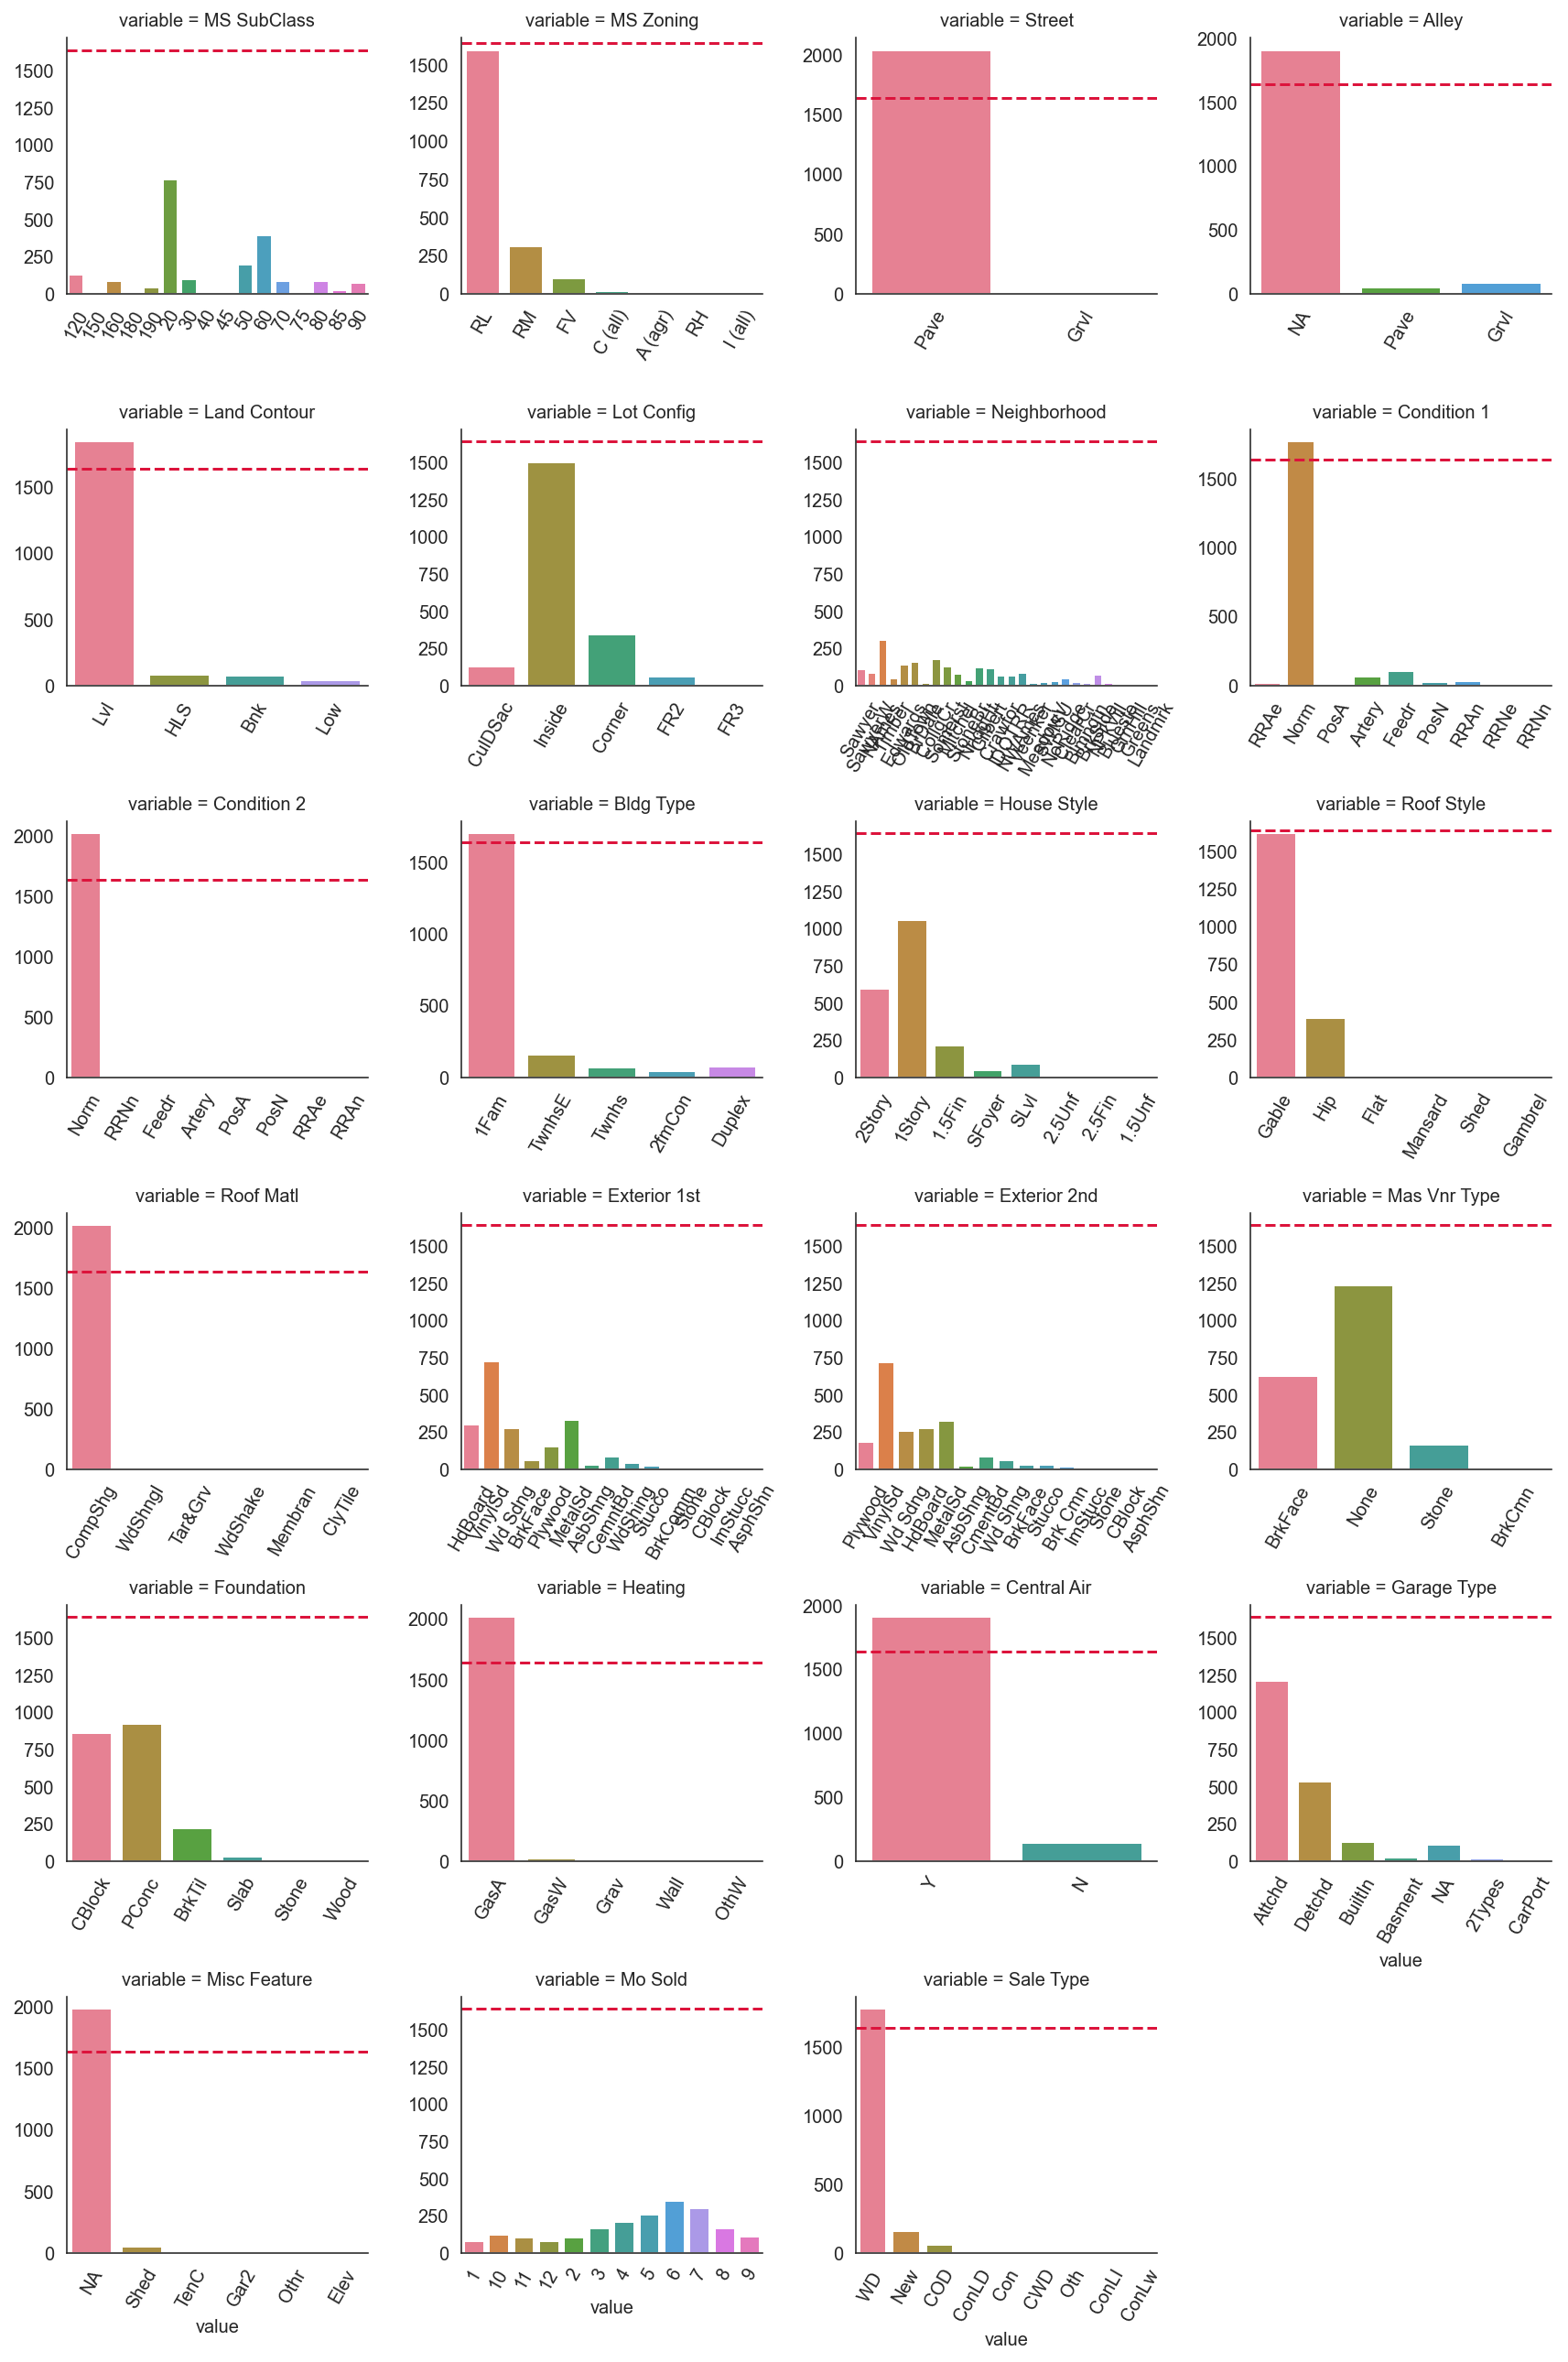

In [97]:
# plotting countplots of nominal categorical variables
data = pd.melt(train, value_vars=nominal_cat)
g = sns.FacetGrid(data, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value', order=None, palette='husl')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
[plt.setp(ax.axhline(0.8*train.shape[0]), ls='--', color = 'crimson') for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Nominal variables with low variability (mode takes up >=80% of records) should not be included in the model:

1. Street
2. Alley
3. Land Contour
4. Condition 1
5. Condition 2
6. Bldg Type
7. Roof Matl
8. Heating
9. Central Air
10. Misc Features
11. Sale Type

Let's also visually take a closer look at Neighborhood and MS SubClass vs. SalePrice.

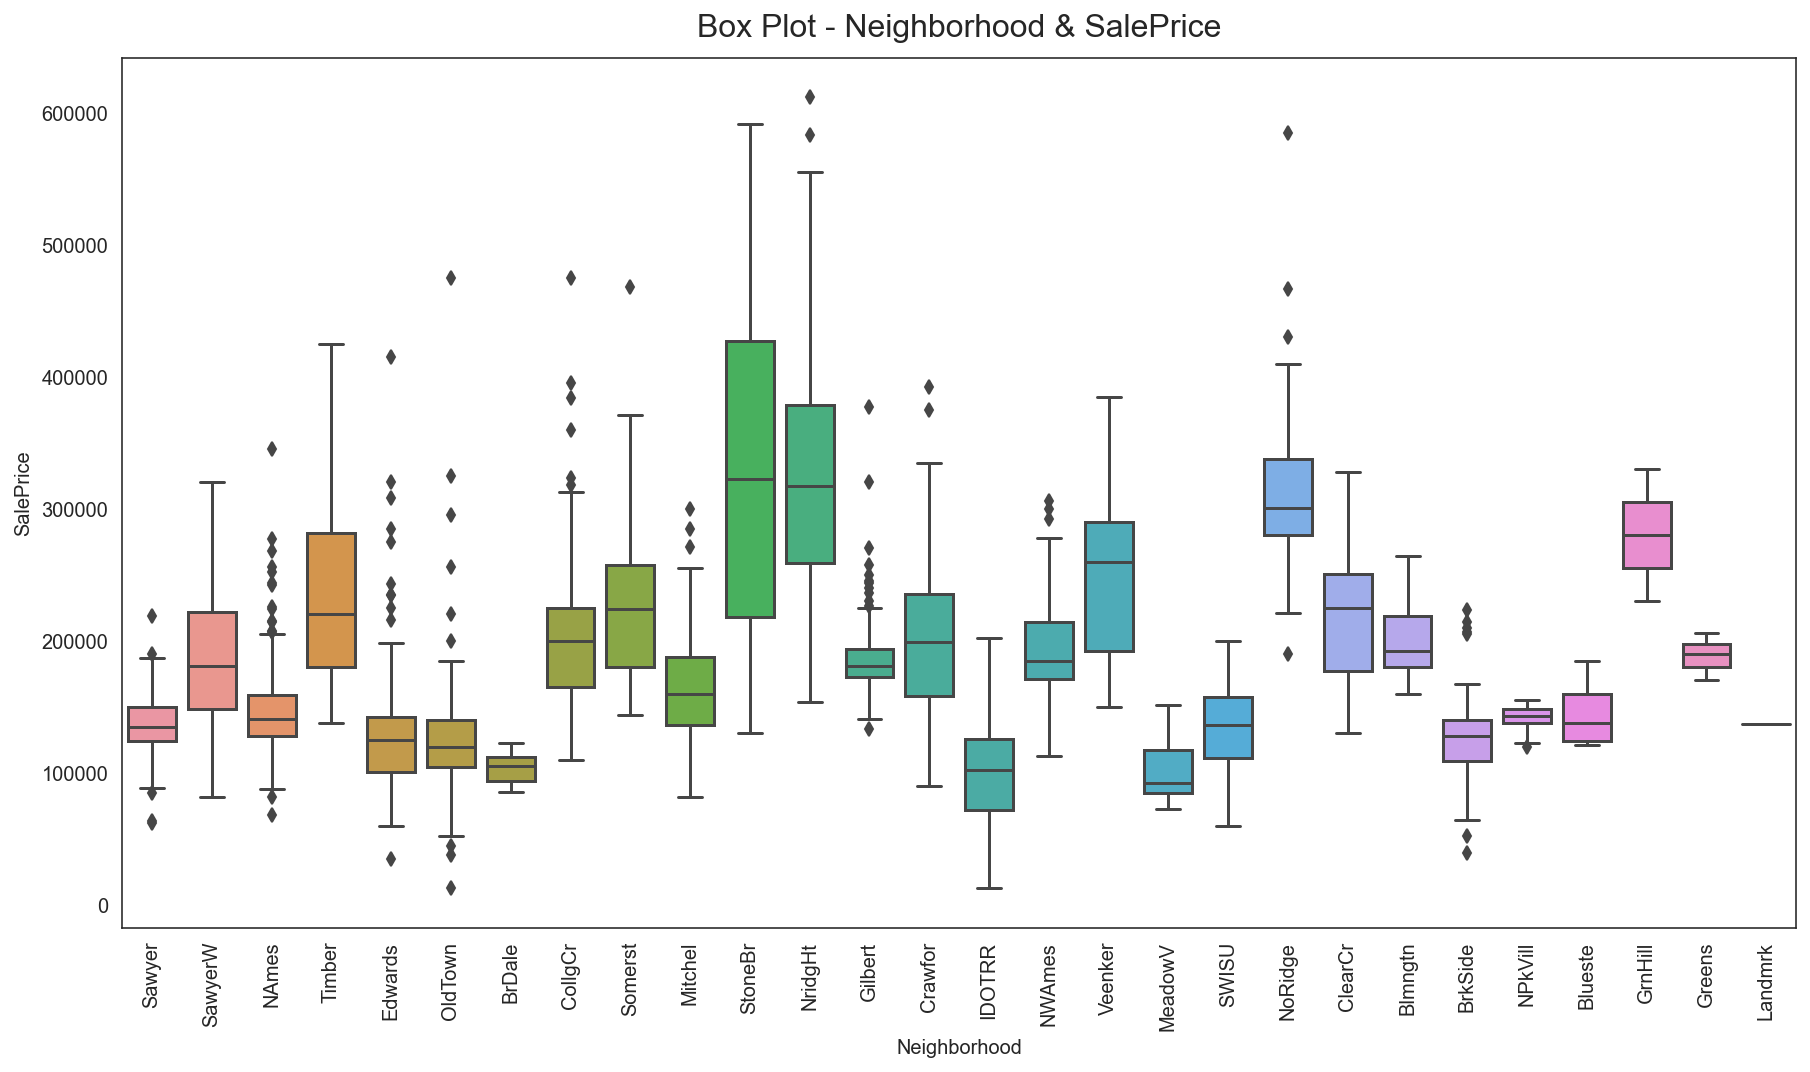

In [98]:
# plotting box plot of Neighbourhood vs SalePrice
plt.figure(figsize=(15, 8))
g = sns.boxplot(data=train, x='Neighborhood', y='SalePrice');
plt.xticks(rotation=90)
g.set_title('Box Plot - Neighborhood & SalePrice', fontsize=16, y=1.01);

Neighborhoods like StoneBr, NridgeHt, NoRidge have relatively higher SalePrice. Given that Ames is a university town, it is no surprise that areas near the Iowa State University fetch higher SalePrice.

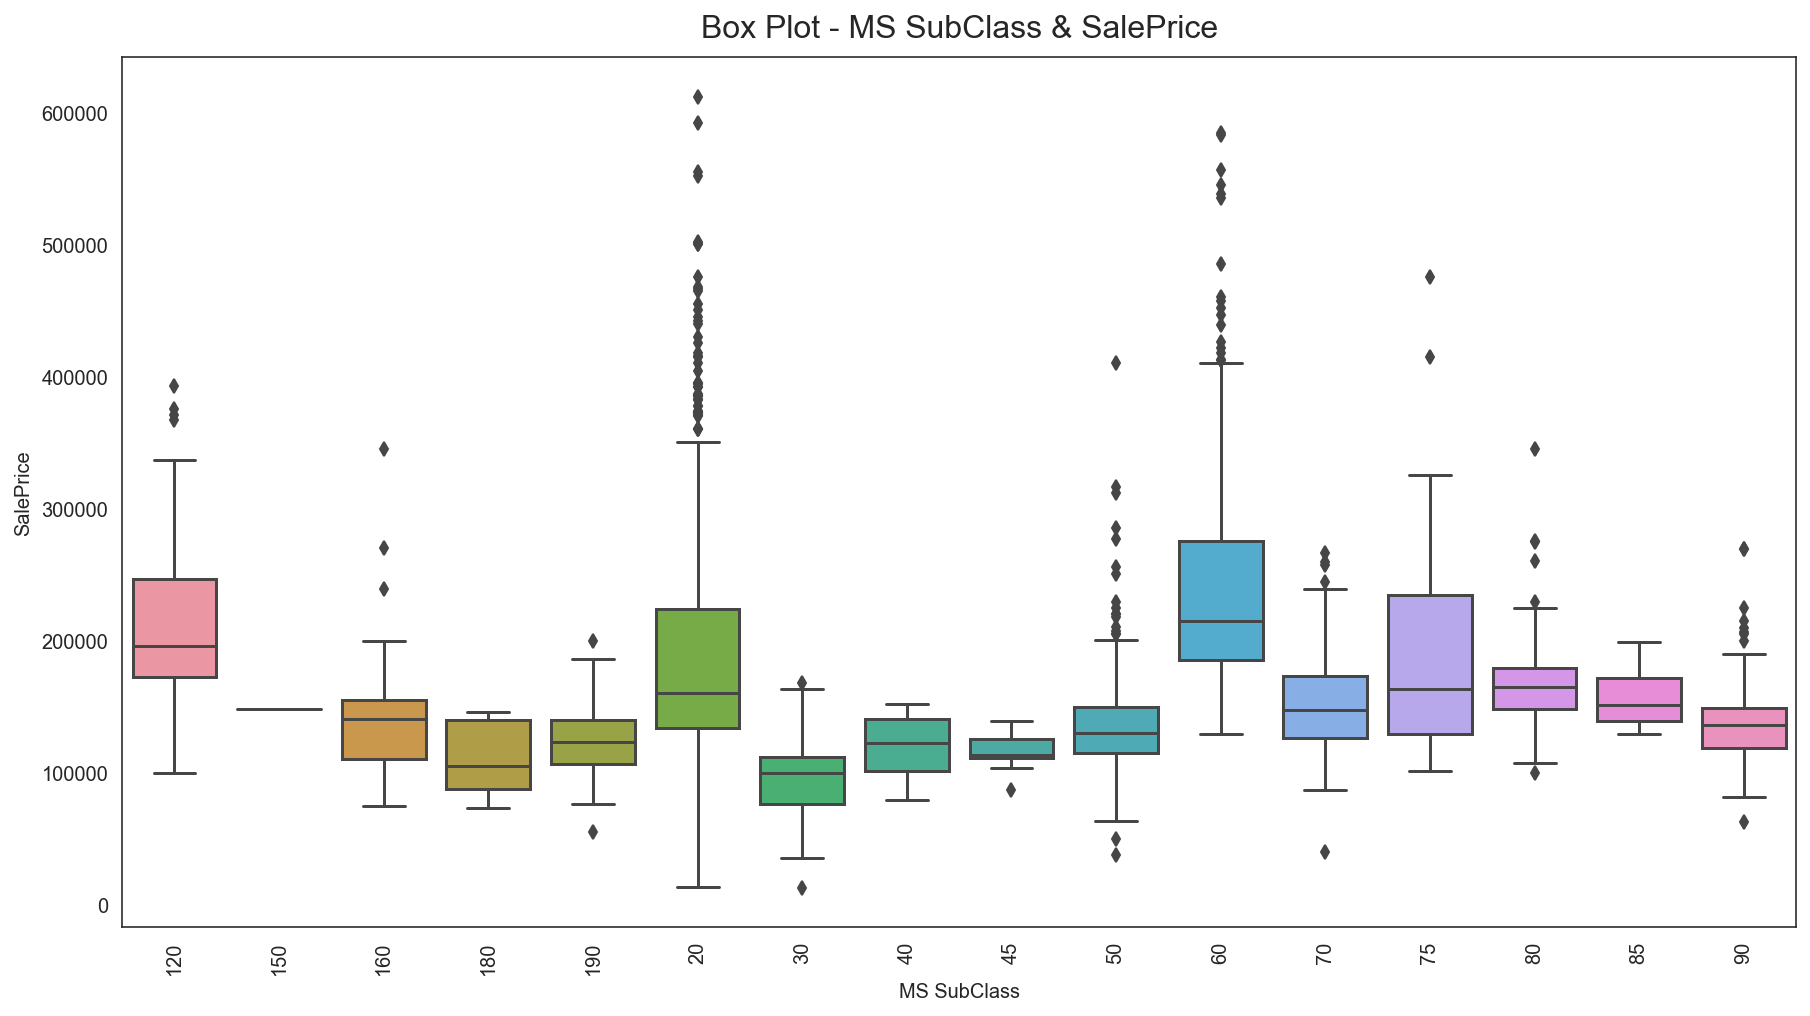

In [99]:
# plotting box plot of MS SubClass vs SalePrice
plt.figure(figsize=(15, 8))
g = sns.boxplot(data=train, x='MS SubClass', y='SalePrice');
plt.xticks(rotation=90)
g.set_title('Box Plot - MS SubClass & SalePrice', fontsize=16, y=1.01);

SalePrice also seem to be higher for certain MS SubClass, such as:
* 020: 1-STORY 1946 & NEWER ALL STYLES
* 060: 2-STORY 1946 & NEWER
* 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER

These seem to be the newer dwelling types.

## 3. Feature Engineering & Selection
### 3.1 Feature Engineering

#### 3.1.1 Total Area

As seen earlier in EDA, many numeric continuous variables are highly correlated to SalePrice, but are also inter-correlated, which is logically so. As such, let's create a new feature Total Area:

Total Area 
= Gr Liv Area + Total Bsmt SF + Wood Deck SF + Open Porch SF + Enclosed Porch SF + 3-Ssn Porch + Screen Porch + Pool Area + Garage Area

In [100]:
train['Total Area'] = train['Gr Liv Area'] + train['Total Bsmt SF'] + train['Wood Deck SF'] + train['Open Porch SF'] + train['Enclosed Porch'] + train['3Ssn Porch'] + train['Screen Porch'] + train['Pool Area'] + train['Garage Area']
test['Total Area'] = test['Gr Liv Area'] + test['Total Bsmt SF'] + test['Wood Deck SF'] + test['Open Porch SF'] + test['Enclosed Porch'] + test['3Ssn Porch'] + test['Screen Porch'] + test['Pool Area'] + test['Garage Area']

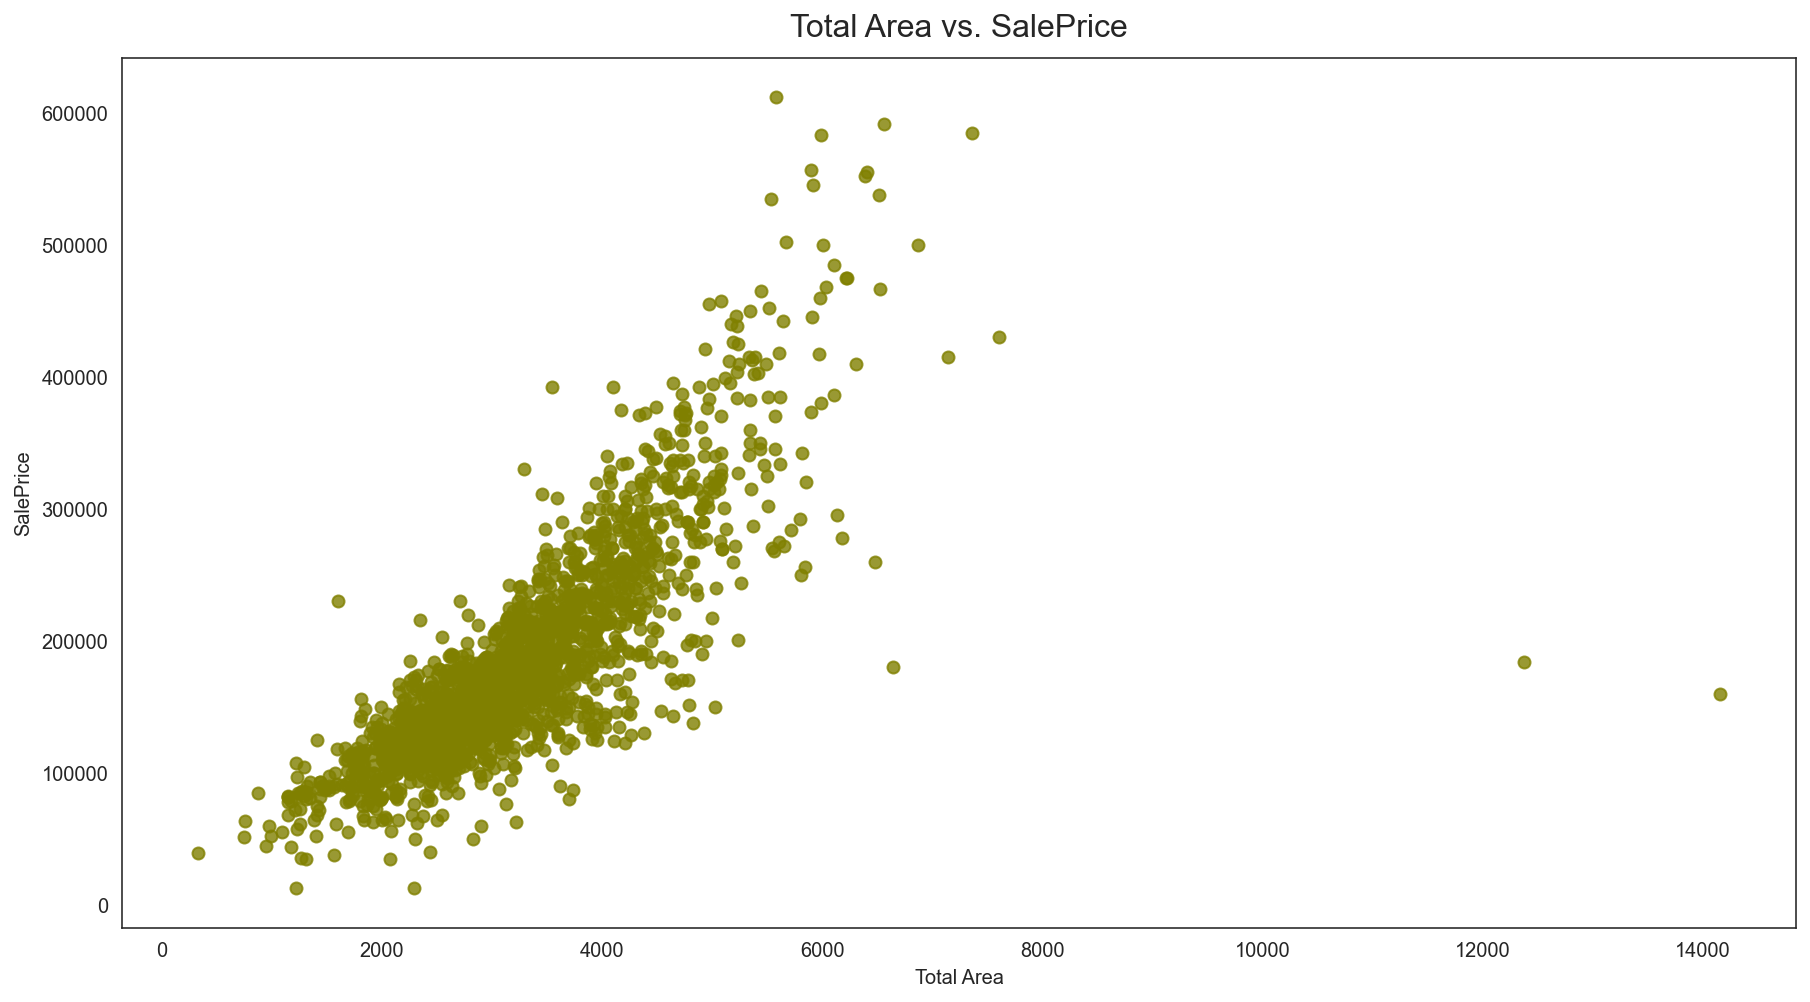

In [101]:
# plotting Total Area vs SalePrice
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='Total Area', y='SalePrice', fit_reg=False, color='olive');
g.set_title('Total Area vs. SalePrice', fontsize=16, y=1.01);

There seems to be an outlier with Total Area > 6000. Let's take a look.

In [102]:
train[train['Total Area'] > 10000]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  Lot Shape  \
960           60        RL         313.0     63887   Pave    NA          0   
1885          20        RL         128.0     39290   Pave    NA          2   

     Land Contour  Utilities Lot Config  ...  Pool Area Pool QC Fence  \
960           Bnk          3     Corner  ...        480       3     0   
1885          Bnk          3     Inside  ...          0       0     0   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  Total Area  
960            NA        0       1     2008        New     160000     14156.0  
1885         Elev    17000      10     2007        New     183850     12374.0  

[2 rows x 80 columns]

Let's go ahead and drop this row.

In [103]:
train.drop([960, 1885], inplace=True)

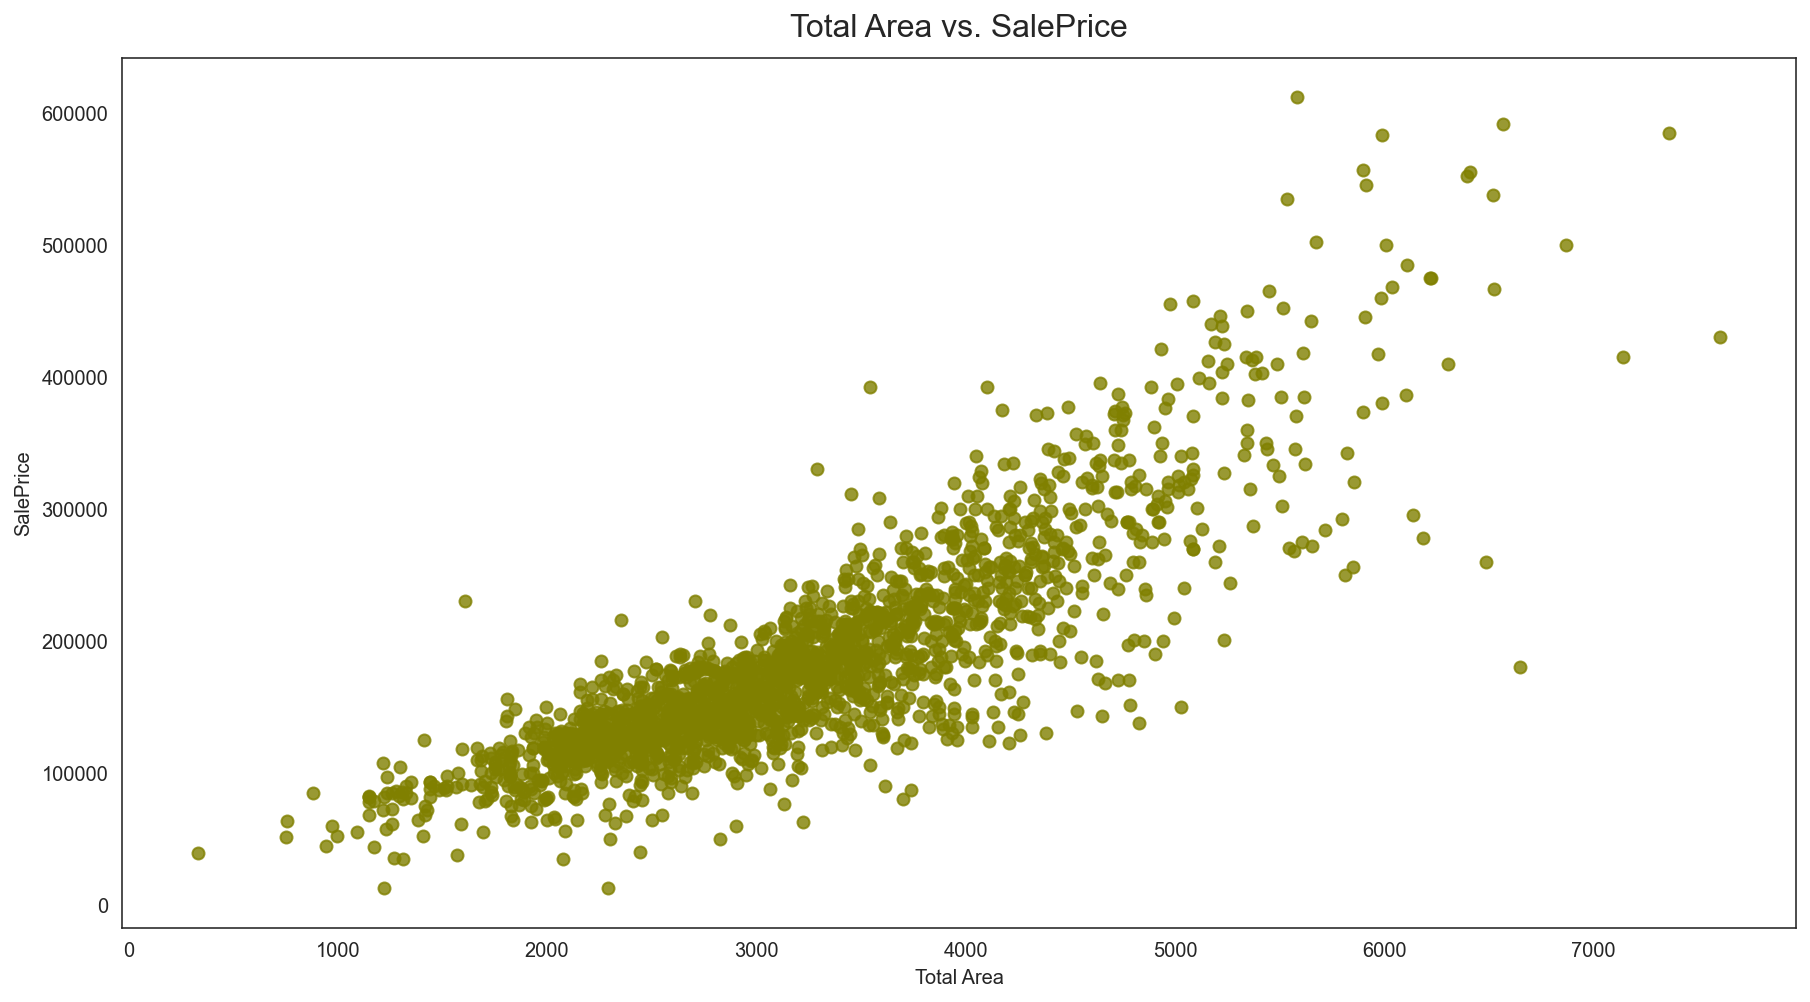

In [104]:
# plotting Total Area vs SalePrice again
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='Total Area', y='SalePrice', fit_reg=False, color='olive');
g.set_title('Total Area vs. SalePrice', fontsize=16, y=1.01);

In [105]:
train['Total Area'].corr(train['SalePrice'])

0.8535398778395964

This new Total Area feature has strong correlation with SalePrice, and can be used in the model in place of Gr Living Area and other floor area related variables.

#### 3.1.2 Age & New House

Let's try to create new features:

Age = Yr Sold - Year Built

In [106]:
train['Age'] = train['Yr Sold'] - train['Year Built']
test['Age'] = test['Yr Sold'] - test['Year Built']

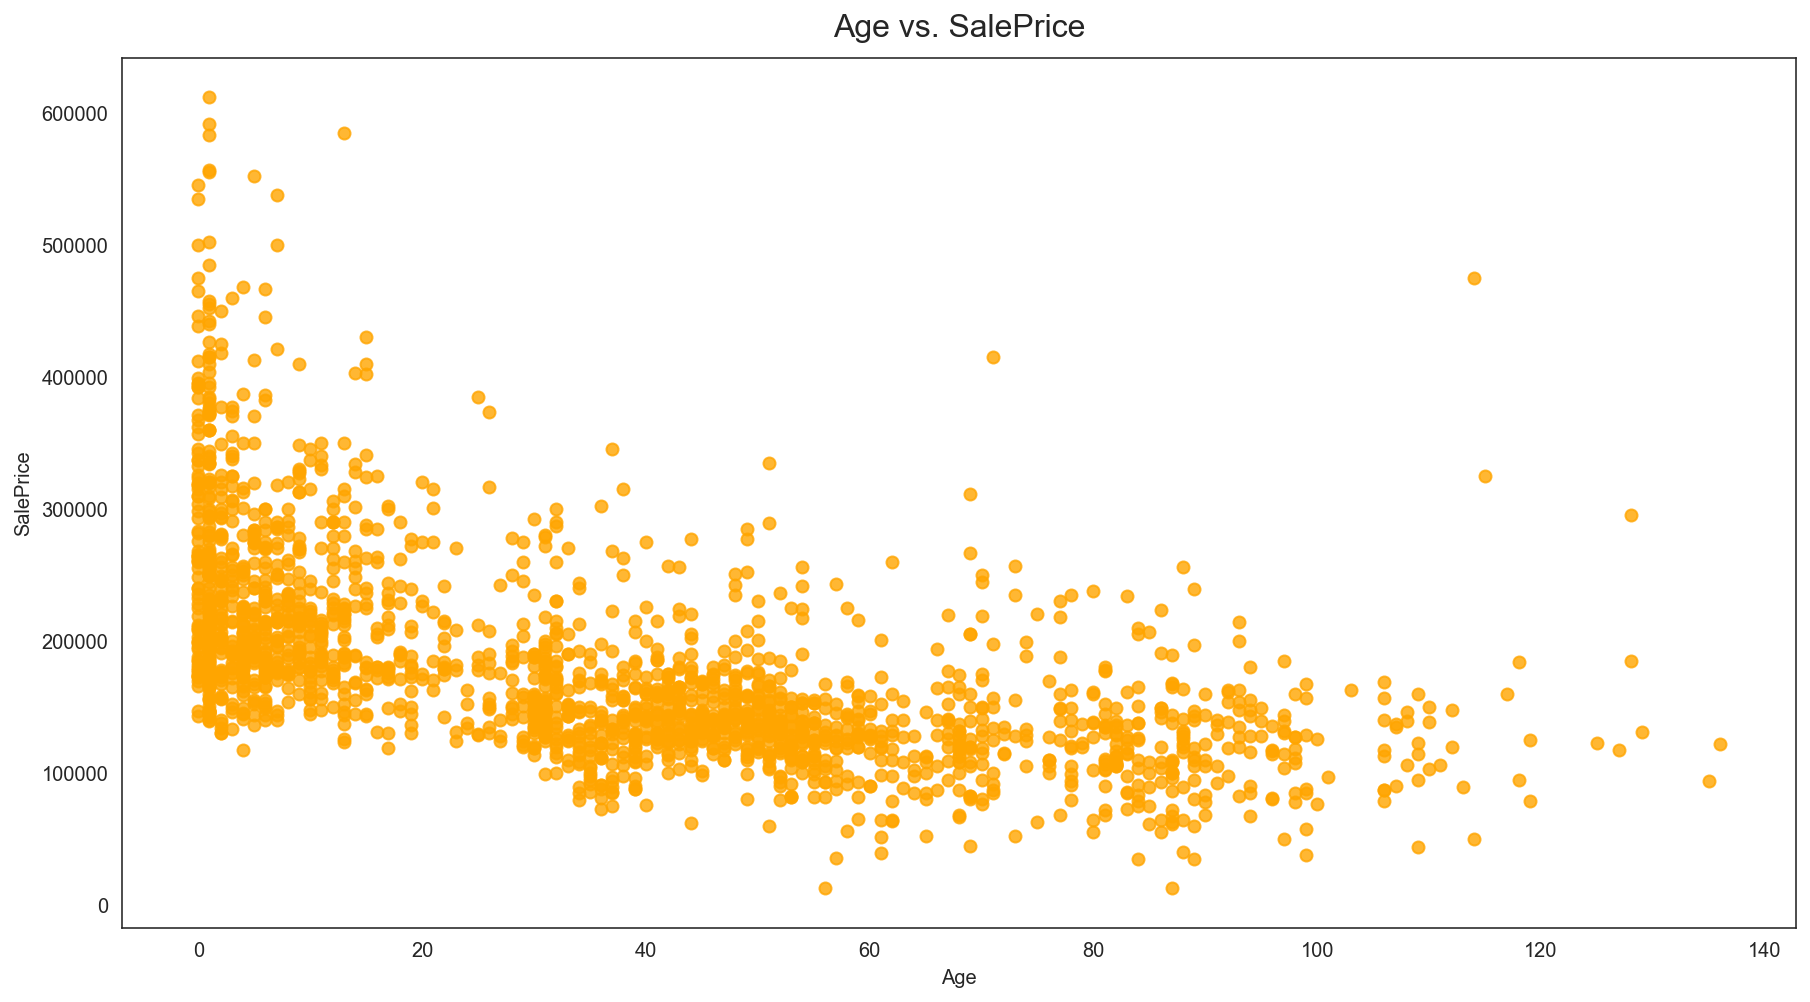

In [107]:
# plotting Age vs SalePrice
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='Age', y='SalePrice', fit_reg=False, color='orange');
g.set_title('Age vs. SalePrice', fontsize=16, y=1.01);

In [108]:
train['Age'].corr(train['SalePrice'])

-0.5724412417902198

Noting earlier that houses built after 1985 (i.e. Age <25) seems to fetch better SalePrice, let's also build a categorical feature for this (for separate models not using Age).

New House:

* 1: Age <=25
* 0: Age >25

In [109]:
train['New House'] = (train['Age'] <= 25).astype(int)
test['New House'] = (test['Age'] > 25).astype(int)

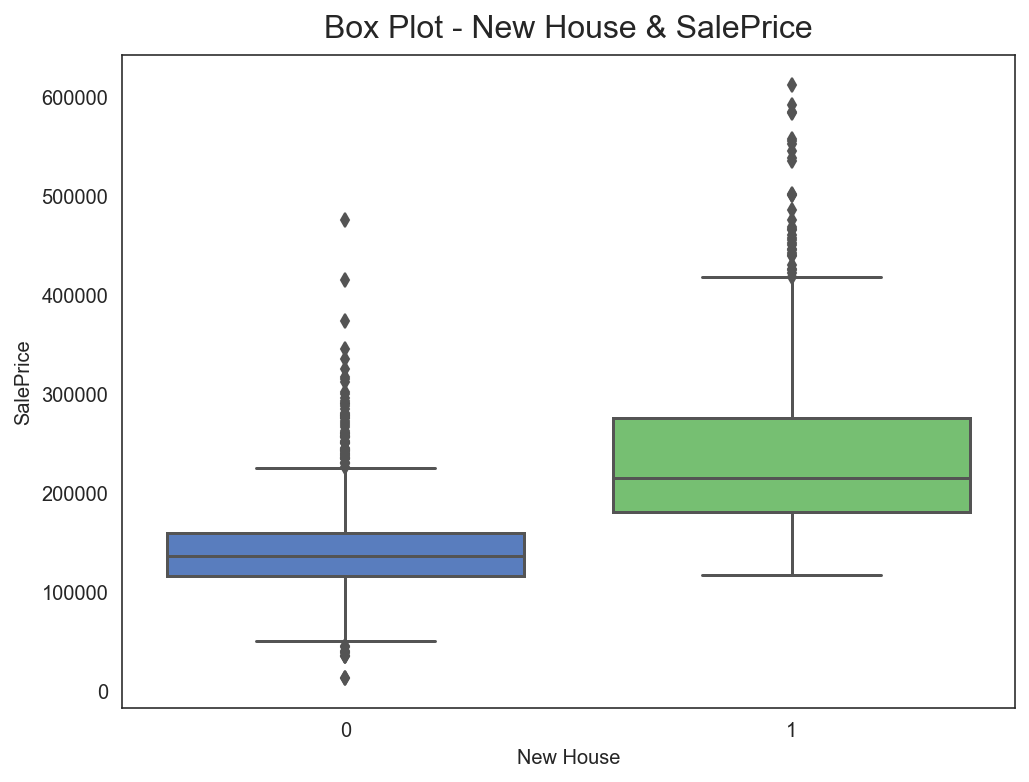

In [110]:
# plotting boxplot of new feature New House vs. SalePrice
plt.figure(figsize=(8, 6))
g = sns.boxplot(data=train, x='New House', y='SalePrice');
g.set_title('Box Plot - New House & SalePrice', fontsize=16, y=1.01);

In [111]:
train['New House'].corr(train['SalePrice'])

0.6003628041177373

This New House feature has slightly stronger correlation with SalePrice as compared to Age.

#### 3.1.3 Total Bath

Let's try to build a new feature Total Bath that comprises of all the bathroom related features. Half bath will be counted as 0.5 bathroom.

Total Bath = Full Bath + (Half Bath * 0.5) + Bsmt Full Bath + (Bsmt Half Bath * 0.5)

In [112]:
train['Total Bath'] = train['Full Bath'] + (train['Half Bath'] * 0.5) + train['Bsmt Full Bath'] + (train['Bsmt Half Bath'] * 0.5) 
test['Total Bath'] = test['Full Bath'] + (test['Half Bath'] * 0.5) + test['Bsmt Full Bath'] + (test['Bsmt Half Bath'] * 0.5) 

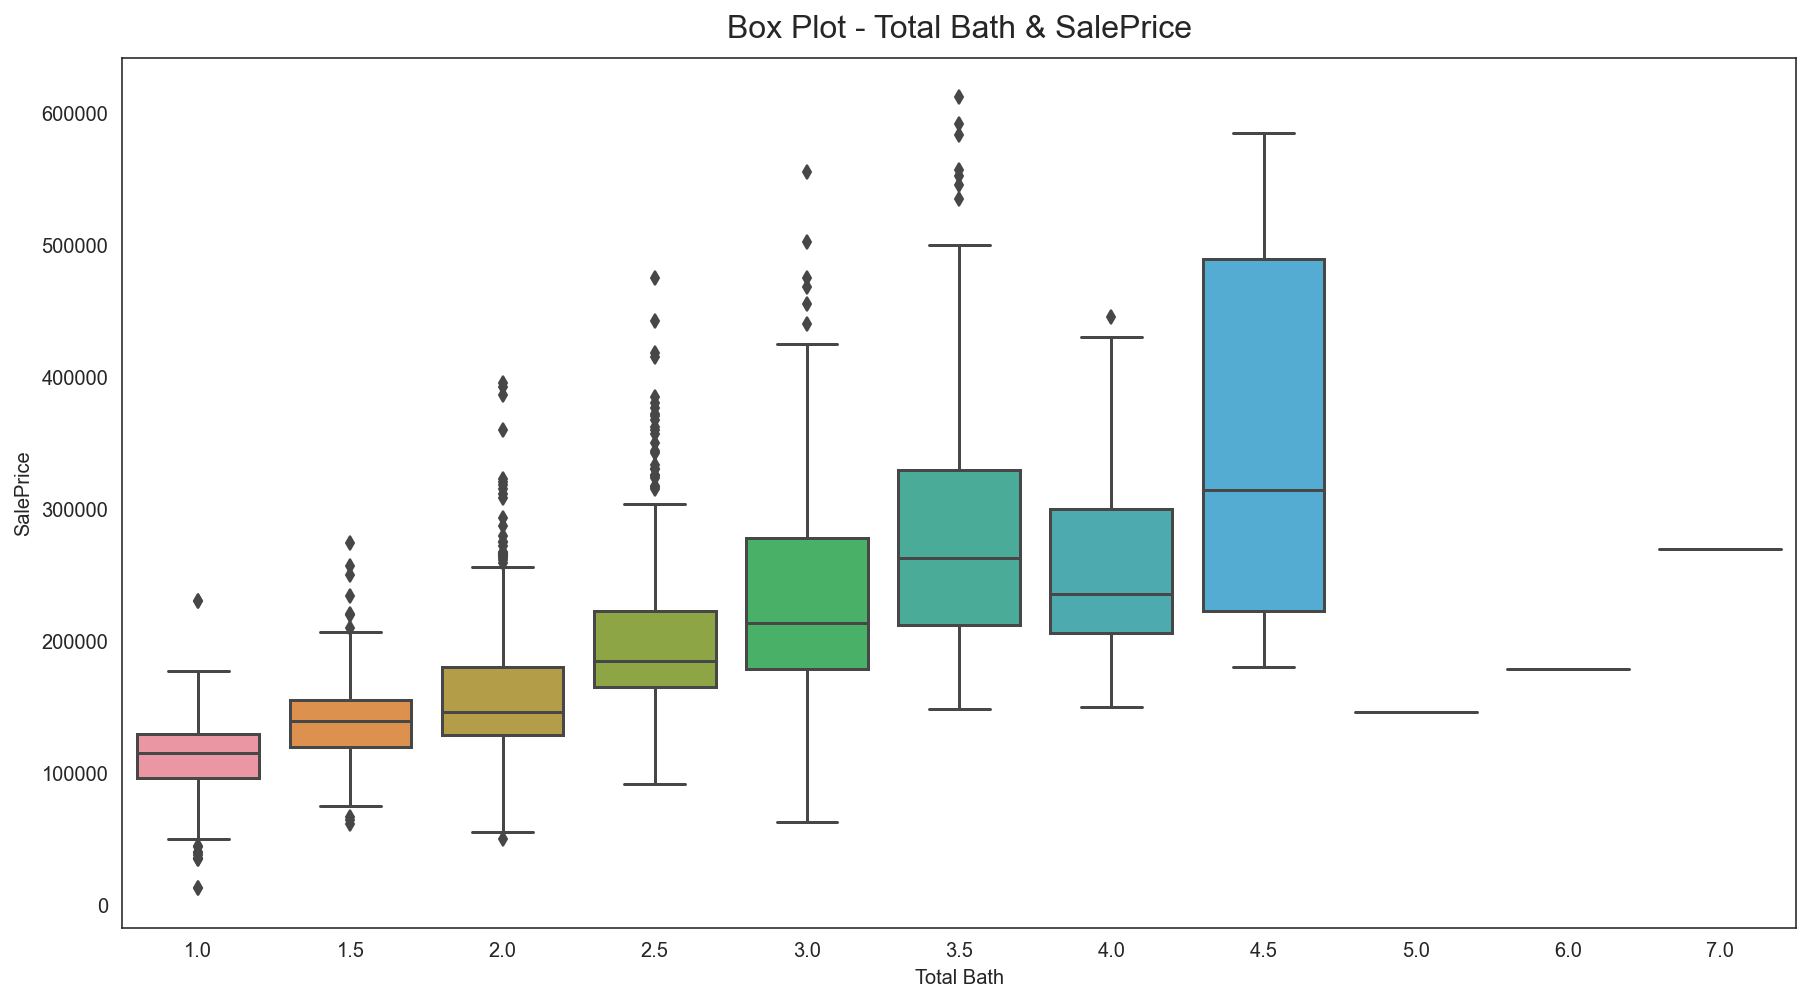

In [113]:
# plotting boxplot of new feature Total Bath vs. SalePrice
plt.figure(figsize=(15, 8))
g = sns.boxplot(data=train, x='Total Bath', y='SalePrice');
g.set_title('Box Plot - Total Bath & SalePrice', fontsize=16, y=1.01);

In [114]:
train['Total Bath'].corr(train['SalePrice'])

0.6325416362735958

Total bath also have good correlation with SalePrice, higher than the Full Bath feature, and can be incorporated in the model.

### 3.2 Feature Selection

Above on the above EDA and feature engineering, the following features are shortlisted for model building.

In [115]:
# creating a list of features 
features = ['Total Area', 'New House', 'Mas Vnr Area', 'Overall Qual', 'Exter Qual', 'Kitchen Qual',
            'Garage Cars', 'Bsmt Qual', 'Garage Finish', 'Fireplace Qu', 'Total Bath', 'TotRms AbvGrd', 'MS SubClass',
           'MS Zoning', 'Lot Config', 'Neighborhood', 'House Style', 'Roof Style', 'Exterior 1st',
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Garage Type', 'Mo Sold']

In [116]:
len(features)

24

### 3.3 One Hot Endcoding

In [117]:
# get the list of features to apply one hot encoding

features_cat = train[features].select_dtypes(include=['object']).columns
features_cat

Index(['MS SubClass', 'MS Zoning', 'Lot Config', 'Neighborhood', 'House Style',
       'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Foundation', 'Garage Type', 'Mo Sold'],
      dtype='object')

Let's apply One-Hot Encoding to these features.

In [118]:
train_features = pd.get_dummies(train[features + ['SalePrice']], columns=features_cat, drop_first=True)

In [119]:
test_features = pd.get_dummies(test[features], columns=features_cat, drop_first=True)

In [120]:
train_features.shape

(2049, 130)

In [121]:
test_features.shape

(879, 125)

Let's check for the columns in the train dataset that is not in the test dataset:

In [122]:
# checking for difference in columns in train and test dataset after One Hot Encoding
features_not_in_test = train_features.columns.difference(test_features.columns)
features_not_in_test 

Index(['Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone',
       'Exterior 2nd_Stone', 'MS SubClass_150', 'MS Zoning_C (all)',
       'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'SalePrice'],
      dtype='object')

Let's save the data to csv.

In [123]:
train_features.to_csv('datasets/train_to_model.csv')
test_features.to_csv('datasets/test_to_model.csv')

## 4. Model Preparation

### 4.1 Train/ Test Split

In [124]:
train_features.columns

Index(['Total Area', 'New House', 'Mas Vnr Area', 'Overall Qual', 'Exter Qual',
       'Kitchen Qual', 'Garage Cars', 'Bsmt Qual', 'Garage Finish',
       'Fireplace Qu',
       ...
       'Mo Sold_11', 'Mo Sold_12', 'Mo Sold_2', 'Mo Sold_3', 'Mo Sold_4',
       'Mo Sold_5', 'Mo Sold_6', 'Mo Sold_7', 'Mo Sold_8', 'Mo Sold_9'],
      dtype='object', length=130)

In the training data set, there are 129 feature columns, and the target column 'SalePrice'.

Let's go ahead and set up X and y for modelling.

In [125]:
# setting up X and y
X_features = [col for col in train_features.columns if col != 'SalePrice']
X = train_features[X_features]
y = train_features['SalePrice']

In [126]:
X.shape

(2049, 129)

In [127]:
y.shape

(2049,)

Next, train/test split will be done.

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [129]:
X_train.shape

(1536, 129)

In [130]:
X_val.shape

(513, 129)

### 4.2 Scaling

In [131]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

## 5. Modeling

Let's use the initial set of 129 features to build our models. 

First, instantiate the following models:

* Linear Regression
* Lasso CV
* Ridge CV

In [132]:
lr = LinearRegression()

In [133]:
lasso = LassoCV(n_alphas=200)

In [134]:
ridge = RidgeCV(alphas = np.logspace(0, 3, 200))

Let's also set up evaluation metrics. Noting that we have a number of features in the model, adjusted R2 is also included in the evaluation matrics.

In [135]:
# defining a function to compute adjusted R2 score since it is not available directly with sklearn
def r2_adj(y_true, y_preds, p):
    """function to compute adjusted R2 score
    input true values of y, predicted values of y, number of parameters"""
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [136]:
def cross_validation(model_name, model, X_train, X_test, y_train, y_test):
    """function to compute cross val score, R2 and MSE
    input model_name, model object, X_train, X_test, y_train, y_test"""
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    cv_mse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    print('Model Name               : ' + model_name)
    print('Training R2              : ' + str(model.score(X_train, y_train)))
    print('Testing R2               : ' + str(model.score(X_test, y_test)))
    print('Estimate of Testing R2   : ' + str(cv_score))
    print('Training RMSE            : ' + str(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('Testing RMSE             : ' + str(np.sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    print('Estimate of Testing RMSE : ' + str(np.sqrt(cv_mse)))

### 5.1 Linear Regression

Model fitting and prediction:

In [137]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cross Validation & Model Evaluation:

In [138]:
cross_validation('Linear Regression', lr, X_train_scaled, X_val_scaled, y_train, y_val)

Model Name               : Linear Regression
Training R2              : 0.8992497938875392
Testing R2               : -1.597015660598658e+21
Estimate of Testing R2   : -8.758282012463094e+24
Training RMSE            : 25138.330587807195
Testing RMSE             : 3177501528443155.5
Estimate of Testing RMSE : 2.6073026586938026e+17


Linear regression with 129 features is obviously not a great idea. 

Next, let's attempt regularization using Lasso and Ridge regression.

### 5.2 Lasso Regression (for Feature Selection)

Model fitting and prediction:

In [139]:
lasso.fit(X_train_scaled, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Cross Validation & Model Evaluation:

In [140]:
cross_validation('Lasso Regression', lasso, X_train_scaled, X_val_scaled, y_train, y_val)

Model Name               : Lasso Regression
Training R2              : 0.8910258021822124
Testing R2               : 0.894312937613557
Estimate of Testing R2   : 0.8708840366171262
Training RMSE            : 26144.19667746125
Testing RMSE             : 25848.90164213734
Estimate of Testing RMSE : 28418.661041902364


As seen in the evaluation metrics, Lasso Regression shows marked improvement over Linear Regession because overfitting issue has been handled by the model.

It is noted that the training R2 score is a little higher than testing R2 score, indicating that there is still slight overfitting.

In [141]:
lasso.alpha_

521.1653778282578

Let's look at the most important features from the Lasso model.

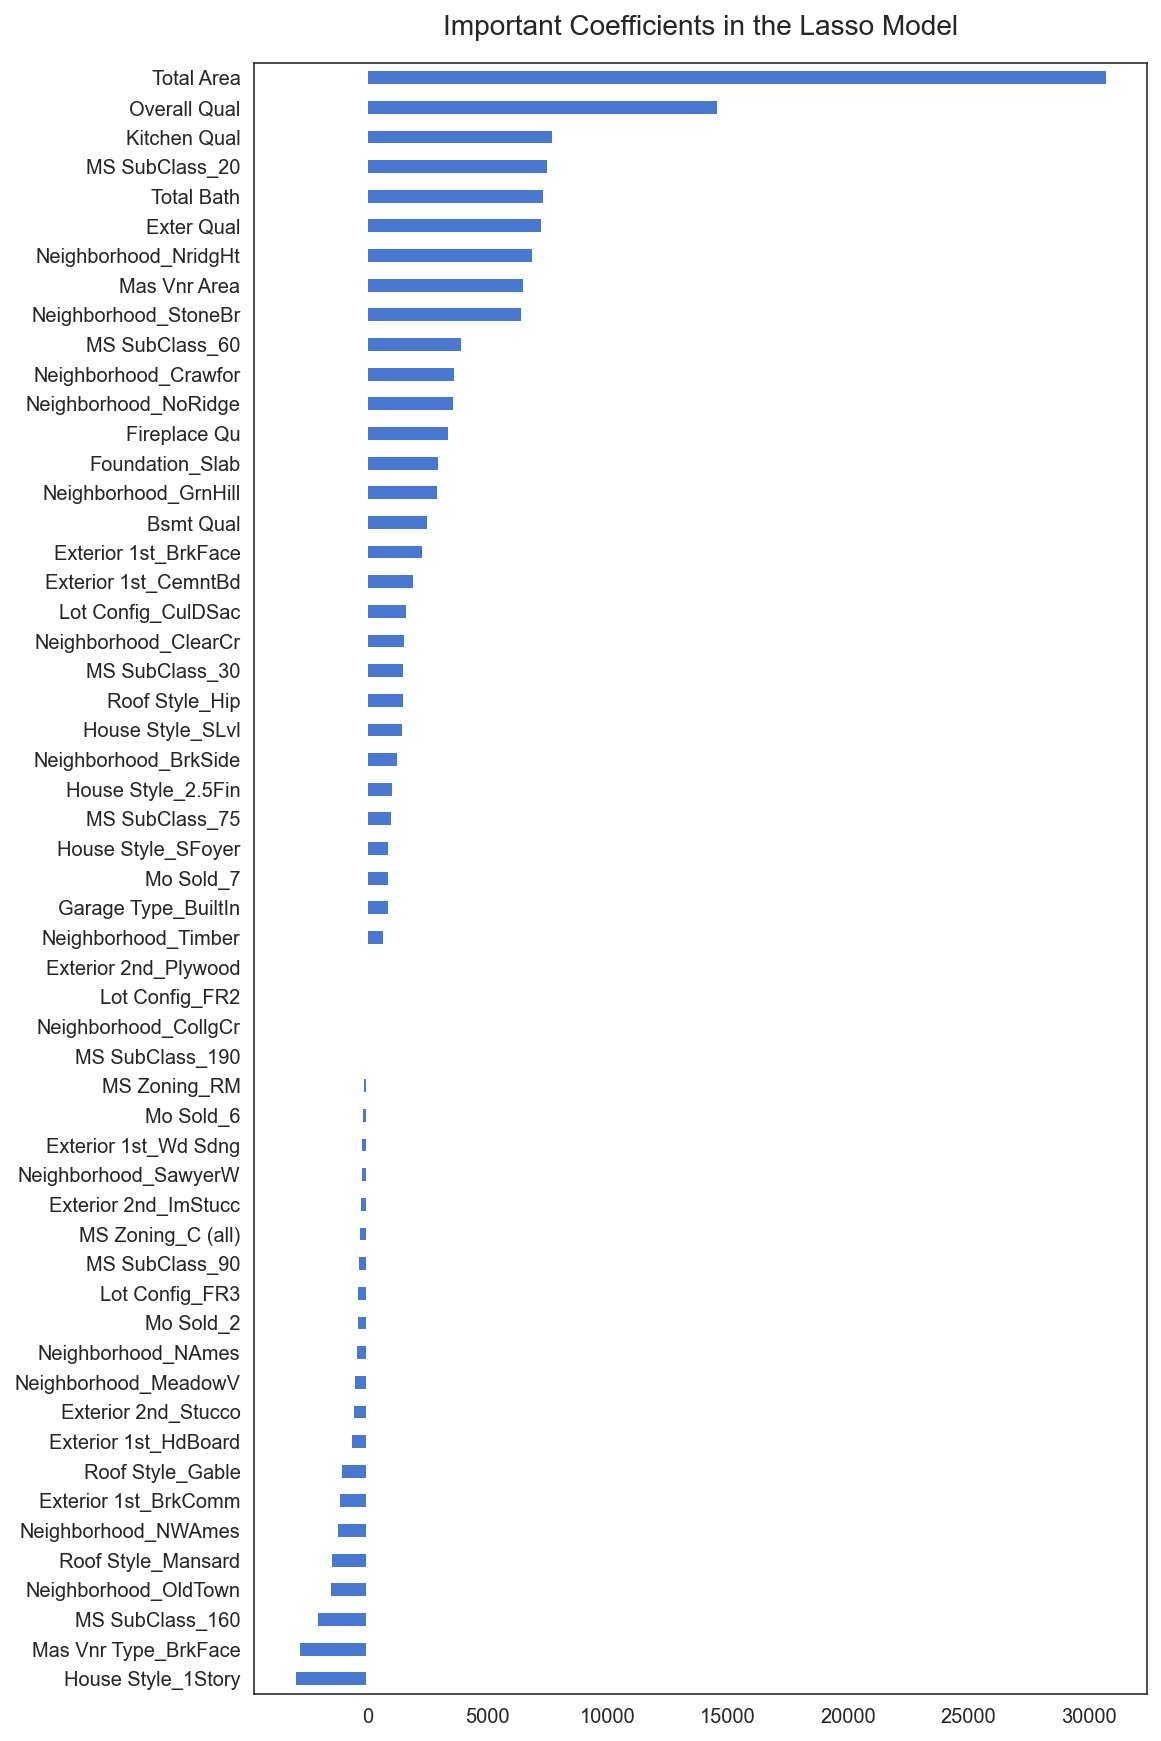

In [142]:
lasso_coef = pd.Series(lasso.coef_, index = X_train.columns)
important_lasso_coef = pd.concat([lasso_coef.sort_values().head(25), lasso_coef.sort_values().tail(30)])
plt.rcParams['figure.figsize'] = (8.0, 15.0)
important_lasso_coef.plot(kind='barh')
plt.title('Important Coefficients in the Lasso Model', fontsize=14, y=1.01);

As seen, the coefficients of some features have been shrunk to zero with the Lasso model.

Total Area is the strongest predictor in this model.

In [143]:
lasso_coef_df = pd.DataFrame({'variable': X_train.columns,
                             'coef': lasso.coef_,
                             'coef_abs': np.abs(lasso.coef_)})

Let's see how many variables have their coefficients shrunk to zero.

In [144]:
lasso_coef_df[lasso_coef_df['coef'] ==0]['variable'].count()

63

Out of 129 features, the Lasso model removes 63 features, leaving 66, which is still a lot of features!

Let's take a look at the top 30 features by highest absolute value of lasso coefficients:

In [145]:
lasso_coef_df.sort_values('coef_abs', ascending=False).head(30)

variable          coef      coef_abs
0              Total Area  30735.519253  30735.519253
3            Overall Qual  14591.596488  14591.596488
5            Kitchen Qual   7733.334624   7733.334624
16         MS SubClass_20   7494.097212   7494.097212
10             Total Bath   7351.623371   7351.623371
4              Exter Qual   7278.036993   7278.036993
55   Neighborhood_NridgHt   6899.727393   6899.727393
2            Mas Vnr Area   6514.388218   6514.388218
61   Neighborhood_StoneBr   6447.697299   6447.697299
21         MS SubClass_60   3934.863132   3934.863132
42   Neighborhood_Crawfor   3653.089181   3653.089181
54   Neighborhood_NoRidge   3599.530762   3599.530762
9            Fireplace Qu   3398.540219   3398.540219
65     House Style_1Story  -3008.785667   3008.785667
109       Foundation_Slab   2982.080253   2982.080253
46   Neighborhood_GrnHill   2933.078985   2933.078985
104  Mas Vnr Type_BrkFace  -2835.953159   2835.953159
7               Bsmt Qual   2527.364887   2527.364887
78   Exterior 1st_BrkFace   2331.773363   2331.773363
13        MS SubClass_160  -2095.781339   2095.781339
80   Exterior 1st_CemntBd   1958.448650   1958.448650
33     Lot Config_CulDSac   1629.430140   1629.430140
40   Neighborhood_ClearCr   1577.325176   1577.325176
56   Neighborhood_OldTown  -1541.751411   1541.751411
17         MS SubClass_30   1520.429341   1520.429341
74     Roof Style_Mansard  -1517.910911   1517.910911
73         Roof Style_Hip   1512.499289   1512.499289
70       House Style_SLvl   1484.763059   1484.763059
39   Neighborhood_BrkSide   1282.234100   1282.234100
53    Neighborhood_NWAmes  -1253.471144   1253.471144

### 5.3 Ridge Regression

Instantiating the RidgeCV and fitting the model.

In [146]:
ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([   1.        ,    1.03532184,    1.07189132,    1.1097525 ,
          1.148951  ,    1.18953407,    1.2315506 ,    1.27505124,
          1.3200884 ,    1.36671636,    1.4149913 ,    1.4649714 ,
          1.51671689,    1.57029012,    1.62575567,    1.68318035,
          1.74263339,    1.80418641,    1.8679136 ,    1.93389175,
          2.00220037,    2.07292178,    2.1461412 ,    2.22194686,
          2.30043012,    2.38168555,    2.46581108,    2.55290807,
          2.64308149,    2.73644   ,    2.8330961 ,    2.933166...
        450.05576757,  465.95256687,  482.41087042,  499.45051159,
        517.09202429,  535.35666774,  554.26645207,  573.84416483,
        594.1133985 ,  615.09857886,  636.82499447,  659.31882713,
        682.60718343,  706.71812739,  731.68071434,  757.52502588,
        784.28220613,  811.98449932,  840.66528856,  870.35913615,
        901.10182517,  932.93040263,  965.88322412, 1000.        ]),
        cv=None, fit_intercept=True, gcv_mode

Cross Validation & Model Evaluation:

In [147]:
cross_validation('Ridge Regression', ridge, X_train_scaled, X_val_scaled, y_train, y_val)

Model Name               : Ridge Regression
Training R2              : 0.8968579591798909
Testing R2               : 0.8923680497448887
Estimate of Testing R2   : 0.8661016267608224
Training RMSE            : 25434.97538955212
Testing RMSE             : 26085.657362244572
Estimate of Testing RMSE : 28901.046139151673


**Evaluation:**

The Lasso Regression model gives a slightly lower RMSE of 28418 (vs. 28901 for Ridge Regression). 

The top 30 coefficients from the Lasso Regression model will be used for model iteration.

## 6. Model Iteration

Based on the Lasso Regression coefficients (absolute values), let's pick top 30 and build a new model.

In [148]:
new_features = list(lasso_coef_df.sort_values('coef_abs', ascending=False).head(30)['variable'])

In [149]:
X_train1 = X_train[new_features]
X_val1 = X_val[new_features]

In [150]:
X_train_scaled1 = ss.fit_transform(X_train1)
X_val_scaled1 = ss.transform(X_val1)

### 6.1 Lasso Regression - 30 features

In [151]:
lasso1 = LassoCV(n_alphas=200)

In [152]:
lasso1.fit(X_train_scaled1, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Cross Validation & Model Evaluation:

In [153]:
cross_validation('Lasso Regression - 30 features', lasso1, X_train_scaled1, X_val_scaled1, y_train, y_val)

Model Name               : Lasso Regression - 30 features
Training R2              : 0.889321505661723
Testing R2               : 0.8962439706954785
Estimate of Testing R2   : 0.8783657896730199
Training RMSE            : 26347.843962285286
Testing RMSE             : 25611.66733616537
Estimate of Testing RMSE : 27578.341603884386


In [154]:
lasso1.alpha_

101.96070818816486

In [155]:
lasso1_coef_df = pd.DataFrame({'variable': new_features,
                             'coef': lasso1.coef_,
                             'coef_abs': np.abs(lasso1.coef_)})

In [156]:
lasso1_coef_df.sort_values('coef_abs', ascending=False)

variable          coef      coef_abs
0             Total Area  30336.861356  30336.861356
1           Overall Qual  14939.581708  14939.581708
3         MS SubClass_20  11559.206715  11559.206715
4             Total Bath   8291.647937   8291.647937
13    House Style_1Story  -8244.766036   8244.766036
2           Kitchen Qual   7810.707614   7810.707614
5             Exter Qual   7679.483362   7679.483362
6   Neighborhood_NridgHt   7368.928714   7368.928714
7           Mas Vnr Area   7253.280392   7253.280392
8   Neighborhood_StoneBr   7107.148540   7107.148540
14       Foundation_Slab   4232.073330   4232.073330
17             Bsmt Qual   4155.325956   4155.325956
16  Mas Vnr Type_BrkFace  -4046.008985   4046.008985
24        MS SubClass_30   4012.179492   4012.179492
10  Neighborhood_Crawfor   3826.392523   3826.392523
11  Neighborhood_NoRidge   3671.078187   3671.078187
15  Neighborhood_GrnHill   3514.777651   3514.777651
12          Fireplace Qu   3448.654447   3448.654447
9         MS SubClass_60   3362.573550   3362.573550
19       MS SubClass_160  -3225.621914   3225.621914
18  Exterior 1st_BrkFace   2867.195758   2867.195758
26        Roof Style_Hip   2648.003400   2648.003400
20  Exterior 1st_CemntBd   2225.870219   2225.870219
22  Neighborhood_ClearCr   2003.666084   2003.666084
23  Neighborhood_OldTown  -1876.389361   1876.389361
25    Roof Style_Mansard  -1849.735118   1849.735118
21    Lot Config_CulDSac   1834.961558   1834.961558
29   Neighborhood_NWAmes  -1642.111758   1642.111758
28  Neighborhood_BrkSide   1621.020616   1621.020616
27      House Style_SLvl   1546.143528   1546.143528

### 6.2 Ridge Regression - 30 Features

In [157]:
ridge1 = RidgeCV(alphas = np.logspace(0, 3, 200))

In [158]:
ridge1.fit(X_train_scaled1, y_train)

RidgeCV(alphas=array([   1.        ,    1.03532184,    1.07189132,    1.1097525 ,
          1.148951  ,    1.18953407,    1.2315506 ,    1.27505124,
          1.3200884 ,    1.36671636,    1.4149913 ,    1.4649714 ,
          1.51671689,    1.57029012,    1.62575567,    1.68318035,
          1.74263339,    1.80418641,    1.8679136 ,    1.93389175,
          2.00220037,    2.07292178,    2.1461412 ,    2.22194686,
          2.30043012,    2.38168555,    2.46581108,    2.55290807,
          2.64308149,    2.73644   ,    2.8330961 ,    2.933166...
        450.05576757,  465.95256687,  482.41087042,  499.45051159,
        517.09202429,  535.35666774,  554.26645207,  573.84416483,
        594.1133985 ,  615.09857886,  636.82499447,  659.31882713,
        682.60718343,  706.71812739,  731.68071434,  757.52502588,
        784.28220613,  811.98449932,  840.66528856,  870.35913615,
        901.10182517,  932.93040263,  965.88322412, 1000.        ]),
        cv=None, fit_intercept=True, gcv_mode

In [159]:
cross_validation('Ridge Regression - 30 features', ridge1, X_train_scaled1, X_val_scaled1, y_train, y_val)

Model Name               : Ridge Regression - 30 features
Training R2              : 0.889268723742087
Testing R2               : 0.8957604379392701
Estimate of Testing R2   : 0.8782719138667645
Training RMSE            : 26354.125778944883
Testing RMSE             : 25671.27681315292
Estimate of Testing RMSE : 27589.366031043002


Again, the Lasso Regression model performs marginally better than Rideg Regression when applied on the 30 features.

Let's proceed with the final model fitting with the Lasso model.

## 7. Generating Predictions on Test Data

### 7.1 Model Fitting

In [160]:
X_train = X[new_features]

In [161]:
X_train_scaled = ss.fit_transform(X_train)

In [162]:
# building a final lasso model with the optimal alpha obtained in LassoCV during model iteration
lasso_final = Lasso(alpha = lasso1.alpha_)

In [163]:
lasso_final.fit(X_train_scaled, y)

Lasso(alpha=101.96070818816486, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Let's plot the predictions vs. actual SalePrice in the train dataset.

In [164]:
y_pred = lasso_final.predict(X_train_scaled)

In [165]:
train['y_pred'] = lasso_final.predict(X_train_scaled)

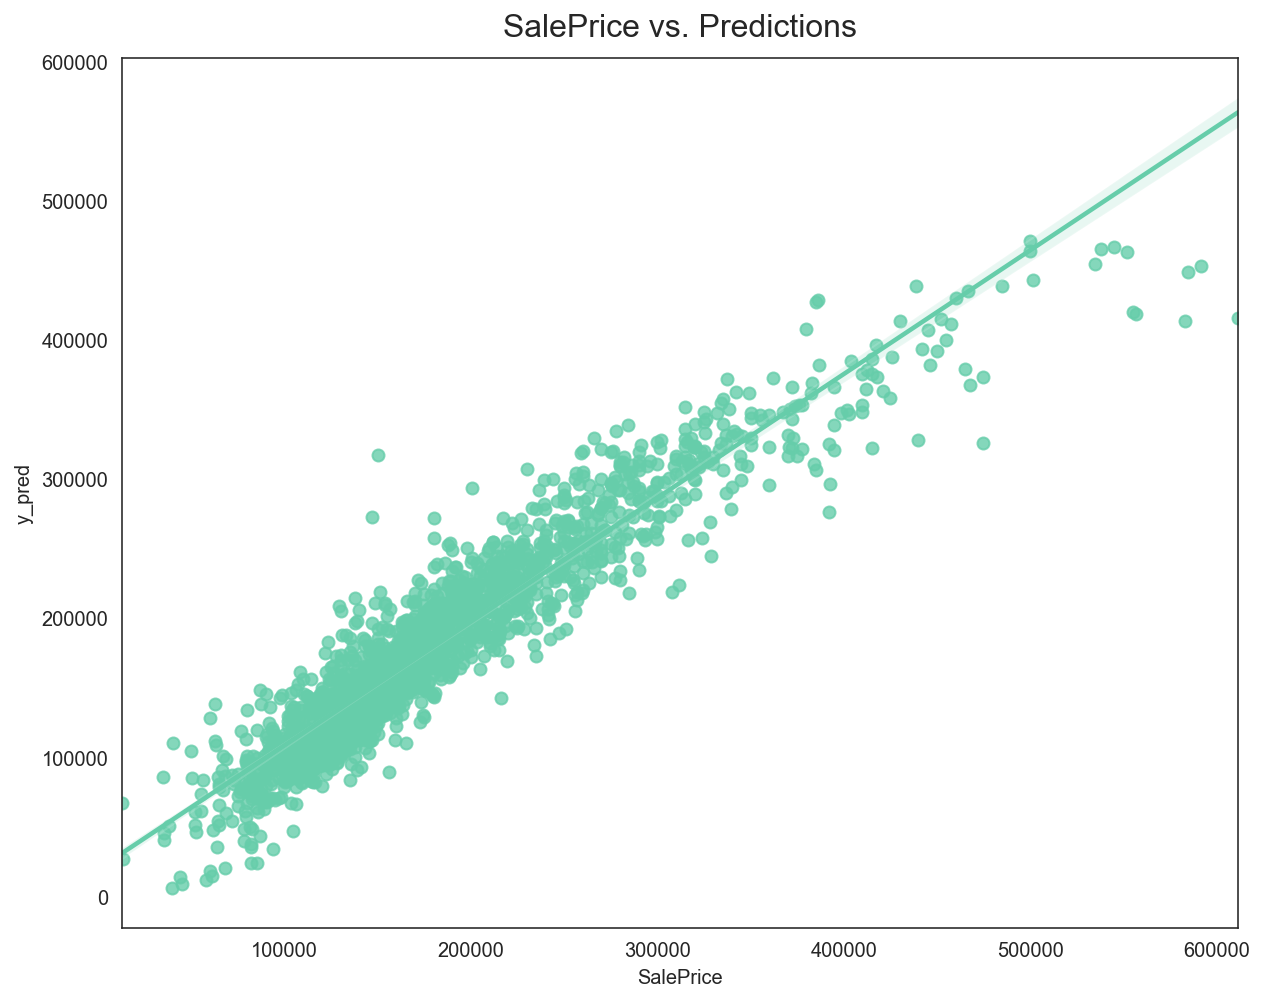

In [166]:
plt.figure(figsize=(10, 8))
g = sns.regplot(data=train, x='SalePrice', y='y_pred', color='mediumaquamarine');
g.set_title('SalePrice vs. Predictions', fontsize=16, y=1.01);

The model generally predicts well for SalePrice below 400000. For SalePrice above 400000, there is a tendency for the prediction to be lower than the true value. 

### 7.2 Generating Predictions

Recall that after One Hot Encoding, there are a few columns in the train dataset not in test dataset.

In [167]:
features_not_in_test

Index(['Exterior 1st_CBlock', 'Exterior 1st_ImStucc', 'Exterior 1st_Stone',
       'Exterior 2nd_Stone', 'MS SubClass_150', 'MS Zoning_C (all)',
       'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'SalePrice'],
      dtype='object')

Let's add them to the test dataset and fill with 0. 

In [168]:
new_col_to_add = [col for col in features_not_in_test if col != 'SalePrice']
new_col_to_add

['Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'MS SubClass_150',
 'MS Zoning_C (all)',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk']

In [169]:
for col in new_col_to_add:
    test_features[col] = 0

In [170]:
X_test = test_features[X_train1.columns]

In [171]:
X_test_scaled = ss.transform(X_test)

In [172]:
lasso_final_coef_df = pd.DataFrame({'variable': new_features,
                             'coef': lasso_final.coef_,
                             'coef_abs': np.abs(lasso_final.coef_)})

In [173]:
# coefficients of the final model, sorted by absolute value
lasso_final_coef_df.sort_values('coef_abs', ascending=False)

variable          coef      coef_abs
0             Total Area  30860.139490  30860.139490
1           Overall Qual  14884.177216  14884.177216
3         MS SubClass_20  11264.371397  11264.371397
7           Mas Vnr Area   8427.839832   8427.839832
13    House Style_1Story  -7781.354193   7781.354193
4             Total Bath   7775.977298   7775.977298
2           Kitchen Qual   7735.632069   7735.632069
5             Exter Qual   7500.519014   7500.519014
6   Neighborhood_NridgHt   7103.211829   7103.211829
8   Neighborhood_StoneBr   6751.069823   6751.069823
16  Mas Vnr Type_BrkFace  -4138.355875   4138.355875
14       Foundation_Slab   3996.381958   3996.381958
17             Bsmt Qual   3952.238069   3952.238069
15  Neighborhood_GrnHill   3781.821695   3781.821695
24        MS SubClass_30   3699.067111   3699.067111
19       MS SubClass_160  -3674.651046   3674.651046
9         MS SubClass_60   3651.077383   3651.077383
10  Neighborhood_Crawfor   3611.850426   3611.850426
12          Fireplace Qu   3255.194052   3255.194052
11  Neighborhood_NoRidge   3164.629020   3164.629020
18  Exterior 1st_BrkFace   2637.005003   2637.005003
21    Lot Config_CulDSac   2324.035710   2324.035710
20  Exterior 1st_CemntBd   2288.789676   2288.789676
26        Roof Style_Hip   2110.945692   2110.945692
23  Neighborhood_OldTown  -1831.341146   1831.341146
29   Neighborhood_NWAmes  -1744.360481   1744.360481
25    Roof Style_Mansard  -1637.441094   1637.441094
22  Neighborhood_ClearCr   1503.056614   1503.056614
28  Neighborhood_BrkSide   1291.132873   1291.132873
27      House Style_SLvl   1092.312190   1092.312190

In [174]:
# obtain the intercep of the final model
lasso_final.intercept_

181479.01805758907

Based on the above, the way to interpret the model is that:
* Assuming none of the features is available, the Sale Price will be 181479 based on the intercept of the model (theoretically, though unrealistic).
* The coefficient of a given feature will tell us the impact of the feature on Sale Price. For example, for Total Area, an increase of 1 square feet of Total Area will result in an increase of 30860  dollars in Sale Price.

In [175]:
# generate predictions
y_pred = lasso_final.predict(X_test_scaled)

In [176]:
submission['SalePrice'] = y_pred

In [177]:
submission.head()

Id      SalePrice
0  2658  138652.255129
1  2718  175056.538610
2  2414  204762.112435
3  1989  118762.979648
4   625  188812.529432

In [180]:
submission.to_csv('output/submission_final.csv', index=False)

### 7.3 Kaggle Scores

* Public score (RMSE)  : 31661.69157

## 8. Conclusion & Recommendations

The problem statement is to help house 'flippers' to identify ways they can enhance the house to get better Sale Price. Let's take a look at which are the 'actionable' features.

In [181]:
lasso_final_coef_df.sort_values('coef_abs', ascending=False).head(10)

variable          coef      coef_abs
0             Total Area  30860.139490  30860.139490
1           Overall Qual  14884.177216  14884.177216
3         MS SubClass_20  11264.371397  11264.371397
7           Mas Vnr Area   8427.839832   8427.839832
13    House Style_1Story  -7781.354193   7781.354193
4             Total Bath   7775.977298   7775.977298
2           Kitchen Qual   7735.632069   7735.632069
5             Exter Qual   7500.519014   7500.519014
6   Neighborhood_NridgHt   7103.211829   7103.211829
8   Neighborhood_StoneBr   6751.069823   6751.069823

Based on the final model built with 30 features, it is noted that some features have bigger impact on the SalePrice prediction.

The top 10 features are:

1. Total Area            : Total Area of the house 
2. Overall Qual          : Overall material and finish of the house (evaluated on an ordinal scale) 
3. MS SubClass 020       : MS SubClass - 1-STORY 1946 & NEWER ALL STYLES
4. Mas Vnr Area          : Masonry veneer area in square feet
5. House Style_1Story^   : House Style - One storey
6. Total Bath            : Total number of bathrooms (above grade and in basement)
7. Kitchen Qual          : Kitchen quality (ordinal scale)
8. Exter Qual            : Quality of the material on the exterior (evaluated on an ordinal scale) 
9. Neighborhood_NridgeHt : Neighborhood - Northridge Heights
10. Neighborhood_StoneBr : Neighborhood - Stone Brook

^: negative correlation with SalePrice

The **total area** of the house is the biggest predictor of Sale Price. In this model, **every unity increase in total area square feet will increase Sale Price by 30860 dollars**. 

It is also not surprising that better **overall quality** and **newer houses** (as indicated by MS Subclass 020).The **exterior** is also important both in terms of **masonry veneer area** and **quality of the exterior**.

Interestingly, **kitchen quality** and **total number of bathroom** are also strong predictors, which matches what is shown on TV shows such as 'Property Brothers' and 'House Hunter', in which the ladies care a lot about kitchen, and Americans do not seem to like sharing bathrooms.

**One storey** housing has an **inversed relationship with pricing**.

Lastly, **neighborhood** is also key. As the old saying goes, when it comes to housing, it's all 'location, location, 'location'. Neighborhoods such as Northridge Heights and Stone Brook positively impact Sale Price.

Flippers can consider increasing total area by building another storey, if the corresponding increase in Sale Price can offset the cost. Other actionable areas include renovation to improve overall quality, kitchen quality and increase the number of bathroom. Unfortunately, it is impossible to change the neighborhood, so the flippers should first ensure that the house they purchase to flip is in a good location like Northridge Heights and Stone Brook.